In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cat_visual(df,feature):
    if df[feature].nunique() < 3:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()*2.5))
    elif df[feature].nunique() < 5:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()*1.5))
    elif df[feature].nunique() < 20 :
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()/1.2))
    else:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()/1.6))
    gs = plt.GridSpec(2,3)
    f.delaxes(ax[1][1])
    f.delaxes(ax[1][0])
    axnew = f.add_subplot(gs[:,0])
    axnew2 = f.add_subplot(gs[:,1])
    f.delaxes(ax[0][1])
    f.delaxes(ax[0][0])

    #1
    ord = df[[feature,'TARGET']].value_counts().unstack().fillna(0)
    ord['total'] = ord.sum(axis = 1)
    ord.sort_values('total',ascending = False,inplace=True)
    hue_order = ord.index.tolist()
    #ord.drop('order',axis= 1,inplace=True)
    sns.heatmap(ord, annot = True, cmap = 'Greens',fmt = '.2f',ax =axnew,cbar = False)
    

# Create heatmap
    axnew.set_yticklabels(axnew.get_yticklabels(),rotation =360,horizontalalignment =  'center',fontweight='bold')
    axnew.tick_params(bottom = False, left = False,right = False)
    axnew.xaxis.tick_top() 
    axnew.yaxis.tick_right()
    axnew.tick_params(bottom = False, left = False,right = False)
    l,u = (axnew.get_xlim())
    axnew.set_xlim(l,u+(u-l)/2)
    axnew.set_ylabel('')
    axnew.set_xlabel('')

    #2
    sns.barplot(pd.Series([100]*df[feature].nunique(),index=app_train[feature].value_counts(sort=True).index),\
                orient='h',ax=axnew2,color= 'red',width = 0.5,alpha=0.2, label='1')   
    sns.barplot(df[df['TARGET']==0][feature].value_counts() / df[feature].value_counts() *100,\
                orient='h',ax=axnew2,color= 'red',width = 0.5,alpha = 0.4, label='0')
    axnew2.spines[['top','bottom','left','right']].set_visible(False)
    axnew2.xaxis.tick_top() 
    axnew2.tick_params(left=False, bottom = False,top = False)

    axnew2.grid(axis = 'x')
    axnew2.set_xlabel('percent')
    axnew2.set_ylabel('')
    axnew2.set_yticklabels('')
    axnew2.legend(loc = 'upper right')

    #3
    sns.countplot(data= df[df['TARGET']==1], x ='TARGET', hue = feature ,ax= ax[0][2],\
                  stat = 'percent',palette='Set3',edgecolor = 'white',hue_order=hue_order,legend=False)
    sns.countplot(data= df[df['TARGET']==0], x ='TARGET', hue = feature ,ax= ax[1][2],\
                  stat = 'percent',palette='Set3',edgecolor = 'white',hue_order=hue_order,legend=False)
    
    ax[0][2].legend(hue_order,loc = 'upper right')

    for i in range(2):
        ax[i][2].spines[['top','bottom','left','right']].set_color('grey')
        ax[i][2].tick_params(left=False, bottom = False,top = False)
        ax[i][2].set_xlabel('')
 
    #beautify
    # axnew.set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)
    axnew2.set_title('_'*(len(feature)+12)+'\n\n'+'|| '+feature+' ||'+'\n'+'_'*140+'\n\n',fontweight = 'bold',fontsize=12)
    plt.tight_layout(w_pad=2)


In [176]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def __get_df_name(df):
    name = name =[x for x in globals() if globals()[x] is df][0]
    return name

def first_sight(df:pd.DataFrame, name:str):
    print('-'*30)
    print(f'\033[1m{name}\033[0m')
    print('-'*30)
    print(f'\tShape:{df.shape}')
    print(f'\tDuplicate values:{df.shape[0]-df.duplicated().shape[0]}')
    print('\tFirst 5 rows:')
    display(df.head(5))
    print("\tFeatures' datatype:")
    col_info = pd.DataFrame()
    col_info.index = df.columns
    col_info['Datatype'] = df.dtypes
    display(col_info)
    print("\tFeatures' descriptive statistics:")
    display(df.describe().T)
    print("\tFeatures' NaN values::")
    col_info['Number of Missing Values'] = df.isnull().sum()
    col_info['Percent of Missing Values'] = col_info['Number of Missing Values'] / df.shape[0] * 100
    print(f"Number of columns having NaN values: {col_info[col_info['Number of Missing Values'] != 0].shape[0]} columns")
    f, ax = plt.subplots(figsize=(16,16))
    sns.barplot((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(60),\
                orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
    ax.spines[['right','top','bottom','left']].set_visible(False)
    ax.tick_params(left=False)
    ax.xaxis.tick_top() 
    ax.grid(axis='x')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from eda import first_sight
from eda import num_visual
from eda import cat_visual

In [3]:
file_path = 'C:/Users/milky/Documents/Home Credit Risk Management/dseb63_final_project_DP_dataset/'

In [4]:
app_train = pd.read_csv(file_path + "dseb63_application_train.csv", index_col='Unnamed: 0')
app_test = pd.read_csv(file_path + "dseb63_application_test.csv", index_col='Unnamed: 0')
bureau = pd.read_csv(file_path + "dseb63_bureau.csv")
bureau_balance = pd.read_csv(file_path + "dseb63_bureau_balance.csv")
POS_CASH_balance = pd.read_csv(file_path + "dseb63_POS_CASH_balance.csv")
previous_application = pd.read_csv(file_path + "dseb63_previous_application.csv")
credit_card_balance = pd.read_csv(file_path + "dseb63_credit_card_balance.csv")
installments_payments = pd.read_csv(file_path + "dseb63_installments_payments.csv")

In [8]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

def __get_df_name(df):
    name = name =[x for x in globals() if globals()[x] is df][0]
    return name

def first_sight(df:pd.DataFrame, name:str):
    print('-'*30)
    print(f'\033[1m{name}\033[0m')
    print('-'*30)
    print(f'\tShape:{df.shape}')
    print(f'\tDuplicate values:{df.shape[0]-df.duplicated().shape[0]}')
    print('\tFirst 5 rows:')
    display(df.head(5))
    print("\tFeatures' datatype:")
    col_info = pd.DataFrame()
    col_info.index = df.columns
    col_info['Datatype'] = df.dtypes
    display(col_info)
    print("\tFeatures' descriptive statistics:")
    display(df.describe().T)
    print("\tFeatures' NaN values::")
    col_info['Number of Missing Values'] = df.isnull().sum()
    col_info['Percent of Missing Values'] = col_info['Number of Missing Values'] / df.shape[0] * 100
    print(f"Number of columns having NaN values: {col_info[col_info['Number of Missing Values'] != 0].shape[0]} columns")
    f, ax = plt.subplots(figsize=(16,16))
    sns.barplot((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(60),\
                orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
    ax.spines[['right','top','bottom','left']].set_visible(False)
    ax.tick_params(left=False)
    ax.xaxis.tick_top() 
    ax.grid(axis='x')
    #display(col_info[col_info['Number of Missing Values']!=0].sort_values(by='Number of Missing Values', ascending=False)[['Number of Missing Values','Percent of Missing Values']])

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visual_corr(df, feature,n,ax):
    pos = df.loc[feature].sort_values()[-(n+1):-1]
    neg = df.loc[feature].sort_values()[:n]
    t = df.loc['TARGET',feature]
               
    new = pd.concat((pos,neg))
    new.loc['TARGET'] = t
    new = new.sort_values(ascending=False)
    # f, ax = plt.subplots(figsize=(8,5))
    sns.barplot(new.squeeze() ,orient='h',ax = ax,alpha=0.3,width=0.5)

    ax.spines[['top','bottom']].set_visible(False)
    ax.spines[['left','right']].set_color('grey')
    ax.xaxis.tick_top()
    ax.tick_params(left = False,top = False)
    ax.set_xticklabels('')
    l= ax.get_xlim()[1] - ax.get_xlim()[0]

    for p in ax.patches:
        x,y = p.get_xy()
        width = p.get_width()
        # height = p.get_height()
        if width <= 0:
            ax.annotate(xy = (x+l/30 , y+0.4 ), text = str(int(width*100))+'%')
        else:
            ax.annotate(xy = (x-l/16 , y+0.4 ), text = str(int(width*100))+'%')
    sns.barplot(new.tail(n).squeeze() ,orient='h',ax = ax,color ='red',alpha=0.3,width=0.5)
    sns.barplot(data = {'TARGET': t} ,orient='h',ax = ax,color ='lightgreen',alpha=1,width=0.5,\
                edgecolor= 'green')
    
    for i in range(len(new)):
        if new.index[i] == 'TARGET':
            ax.axhline(y=i,linewidth=25, color = 'grey', alpha = 0.2)
            if t <= 0:
                ax.text(x= l/10, y =i+0.145, s = 'Correlate with TARGET')
            else:
                ax.text(x= t+l/13, y =i+0.145, s ='Correlate with TARGET')

    # ax.set_yticklabels(list(new.index), fontdict = {'horizontalalignment': 'left'})
    # ax.axvline(ax.get_xlim()[1]+l/30,color = 'grey',alpha = 0.2)
    ax.set_xlim(ax.get_xlim()[0]-l/24,ax.get_xlim()[1])
    # for i in range(len(new)):
        # ax.yaxis.get_majorticklabels()[i].set_x(0.7)
    ax.set_xlabel('')
    yticklabel = list(map(lambda x: x.replace('TARGET', ''), list(new.index)))
    ax.set_yticklabels(yticklabel)
    # print(xticklabel)


def fence(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    upper = q3 + 1.5*(q3-q1)
    lower = q1 - 1.5*(q3-q1)
    return lower, upper
def num_visual(df,feature, corr, kde = False):   
    """Visualize numeric, continuous feature"""
    
    f, ax = plt.subplots(2,3,figsize =(16,8)) #gridspec_kw={'width_ratios':[1,2,2,2]}
    # calculate upper and lower fence 
    l,u = fence(df, feature)

    # closer look in to quartile, skewness, kurtosis, median, outliner
    # distribution of feature
    v0 = df[(df[feature]<u) & (df[feature]>l)][feature]
    v1 = df[(df['TARGET']==1) & (df[feature]<u) & (df[feature]>l)][feature]
    v2 = df[(df['TARGET']==0) & (df[feature]<u) & (df[feature]>l)][feature]
    if df[feature].nunique() > 10:
        if (l != u):
            if kde == False:
                ax[0][0].hist(v0)
            # cross_tabulation with Target variable
                ax[0][1].hist(v1,color ='red',alpha = 0.3,)
                ax[0][2].hist(v2,color ='green',alpha = 0.4)
            else:
                sns.histplot(v0,ax = ax[0][0],kde = True,bins=15,edgecolor ='white')    
            # cross_tabulation with Target variable
                sns.histplot(v1, color ='red',alpha = 0.3,ax = ax[0][1],kde = True,bins=15,edgecolor ='white') 
                sns.histplot(v2, color ='green',alpha = 0.4,ax = ax[0][2],kde = True,bins=15,edgecolor ='white') 
        else:
            ax[0][0].hist(df[feature],edgecolor ='white')
            # # cross_tabulation with Target variable
            ax[0][1].hist(df[(df['TARGET']==1)][feature],color ='red',alpha = 0.3,edgecolor ='white')
            ax[0][2].hist(df[(df['TARGET']==0)][feature],color ='green',alpha = 0.4,edgecolor ='white') 

    else:
        ax[0][0].bar(df[feature].value_counts().index,df[feature].value_counts().values,\
                     tick_label = df[feature].value_counts().index)

        ax[0][1].bar(df[(df['TARGET']==1)][feature].value_counts().index,\
                     df[(df['TARGET']==1)][feature].value_counts().values,color ='red',alpha = 0.3,\
                        tick_label = df[(df['TARGET']==1)][feature].value_counts().index)
        
        ax[0][2].bar(df[(df['TARGET']==0)][feature].value_counts().index,\
                     df[(df['TARGET']==0)][feature].value_counts().values,color ='green',alpha = 0.4,\
                     tick_label = df[(df['TARGET']==0)][feature].value_counts().index)

    ax[0][1].set_xlim(ax[0][0].get_xlim())
    ax[0][2].set_xlim(ax[0][0].get_xlim())
    ax[0][0].legend(['Both'])
    ax[0][1].legend(['Non-Defaulter'])
    ax[0][2].legend(['Defaulter'])

    # beautify
    for i in range(3):
            ax[0][i].spines[['top','bottom','left','right']].set_color('grey')
            ax[0][i].tick_params(left=False, bottom = False)
            ax[0][i].grid(axis = 'y')
            ax[0][i].set_xlabel('')
            ax[0][i].set_ylabel('')
    ax[0][1].set_title('_'*(len(feature)+12)+'\n\n'+'|| '+feature+' ||'+'\n'+'_'*140+'\n\n',fontweight = 'bold',fontsize=12)
    
    gs = plt.GridSpec(2,12,wspace = 0.3)
    for ax in ax[1,:]:
        ax.remove()
    axnew = f.add_subplot(gs[1,5:11])

    visual_corr(corr ,feature,5,axnew)
    axnew2 = f.add_subplot(gs[1,1:3])
    sns.boxplot(df[feature],ax=axnew2)
    axnew2.spines[['top','bottom','left','right']].set_color('grey')
    axnew2.tick_params(left=False, bottom = False)
    axnew2.set_ylabel('')
    f.tight_layout(h_pad=3)

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visual_corr(df, feature,n,ax):
    pos = df.loc[feature].sort_values()[-(n+1):-1]
    neg = df.loc[feature].sort_values()[:n]
    t = df.loc['TARGET',feature]
               
    new = pd.concat((pos,neg))
    new.loc['TARGET'] = t
    new = new.sort_values(ascending=False)
    # f, ax = plt.subplots(figsize=(8,5))
    sns.barplot(new.squeeze() ,orient='h',ax = ax,alpha=0.3,width=0.5)

    ax.spines[['top','bottom']].set_visible(False)
    ax.spines[['left','right']].set_color('grey')
    ax.xaxis.tick_top()
    ax.tick_params(left = False,top = False)
    ax.set_xticklabels('')
    l= ax.get_xlim()[1] - ax.get_xlim()[0]

    for p in ax.patches:
        x,y = p.get_xy()
        width = p.get_width()
        # height = p.get_height()
        if width <= 0:
            ax.annotate(xy = (x+l/30 , y+0.4 ), text = str(int(width*100))+'%')
        else:
            ax.annotate(xy = (x-l/16 , y+0.4 ), text = str(int(width*100))+'%')
    sns.barplot(new.tail(n).squeeze() ,orient='h',ax = ax,color ='red',alpha=0.3,width=0.5)
    sns.barplot(data = {'TARGET': t} ,orient='h',ax = ax,color ='lightgreen',alpha=1,width=0.5,\
                edgecolor= 'green')
    
    for i in range(len(new)):
        if new.index[i] == 'TARGET':
            ax.axhline(y=i,linewidth=25, color = 'grey', alpha = 0.2)
            if t <= 0:
                ax.text(x= l/10, y =i+0.145, s = 'Correlate with TARGET')
            else:
                ax.text(x= t+l/13, y =i+0.145, s ='Correlate with TARGET')

    # ax.set_yticklabels(list(new.index), fontdict = {'horizontalalignment': 'left'})
    # ax.axvline(ax.get_xlim()[1]+l/30,color = 'grey',alpha = 0.2)
    ax.set_xlim(ax.get_xlim()[0]-l/24,ax.get_xlim()[1])
    # for i in range(len(new)):
        # ax.yaxis.get_majorticklabels()[i].set_x(0.7)
    ax.set_xlabel('')
    yticklabel = list(map(lambda x: x.replace('TARGET', ''), list(new.index)))
    ax.set_yticklabels(yticklabel)
    # print(xticklabel)


def fence(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    upper = q3 + 1.5*(q3-q1)
    lower = q1 - 1.5*(q3-q1)
    return lower, upper
def num_visual(df,feature, corr, kde = False):   
    """Visualize numeric, continuous feature"""
    
    f, ax = plt.subplots(2,3,figsize =(16,8)) #gridspec_kw={'width_ratios':[1,2,2,2]}
    # calculate upper and lower fence 
    l,u = fence(df, feature)

    # closer look in to quartile, skewness, kurtosis, median, outliner
    # distribution of feature
    v0 = df[(df[feature]<u) & (df[feature]>l)][feature]
    v1 = df[(df['TARGET']==1) & (df[feature]<u) & (df[feature]>l)][feature]
    v2 = df[(df['TARGET']==0) & (df[feature]<u) & (df[feature]>l)][feature]
    if df[feature].nunique() > 10:
        if (l != u):
            if kde == False:
                ax[0][0].hist(v0)
            # cross_tabulation with Target variable
                ax[0][1].hist(v1,color ='red',alpha = 0.3,)
                ax[0][2].hist(v2,color ='green',alpha = 0.4)
            else:
                sns.histplot(v0,ax = ax[0][0],kde = True,bins=15,edgecolor ='white')    
            # cross_tabulation with Target variable
                sns.histplot(v1, color ='red',alpha = 0.3,ax = ax[0][1],kde = True,bins=15,edgecolor ='white') 
                sns.histplot(v2, color ='green',alpha = 0.4,ax = ax[0][2],kde = True,bins=15,edgecolor ='white') 
        else:
            ax[0][0].hist(df[feature],edgecolor ='white')
            # # cross_tabulation with Target variable
            ax[0][1].hist(df[(df['TARGET']==1)][feature],color ='red',alpha = 0.3,edgecolor ='white')
            ax[0][2].hist(df[(df['TARGET']==0)][feature],color ='green',alpha = 0.4,edgecolor ='white') 

    else:
        ax[0][0].bar(df[feature].value_counts().index,df[feature].value_counts().values,\
                     tick_label = df[feature].value_counts().index)

        ax[0][1].bar(df[(df['TARGET']==1)][feature].value_counts().index,\
                     df[(df['TARGET']==1)][feature].value_counts().values,color ='red',alpha = 0.3,\
                        tick_label = df[(df['TARGET']==1)][feature].value_counts().index)
        
        ax[0][2].bar(df[(df['TARGET']==0)][feature].value_counts().index,\
                     df[(df['TARGET']==0)][feature].value_counts().values,color ='green',alpha = 0.4,\
                     tick_label = df[(df['TARGET']==0)][feature].value_counts().index)

    ax[0][1].set_xlim(ax[0][0].get_xlim())
    ax[0][2].set_xlim(ax[0][0].get_xlim())
    ax[0][0].legend(['Both'])
    ax[0][1].legend(['Non-Defaulter'])
    ax[0][2].legend(['Defaulter'])

    # beautify
    for i in range(3):
            ax[0][i].spines[['top','bottom','left','right']].set_color('grey')
            ax[0][i].tick_params(left=False, bottom = False)
            ax[0][i].grid(axis = 'y')
            ax[0][i].set_xlabel('')
            ax[0][i].set_ylabel('')
    ax[0][1].set_title('_'*(len(feature)+12)+'\n\n'+'|| '+feature+' ||'+'\n'+'_'*140+'\n\n',fontweight = 'bold',fontsize=12)
    
    gs = plt.GridSpec(2,12,wspace = 0.3)
    for ax in ax[1,:]:
        ax.remove()
    axnew = f.add_subplot(gs[1,5:11])

    visual_corr(corr ,feature,5,axnew)
    axnew2 = f.add_subplot(gs[1,1:3])
    sns.boxplot(df[feature],ax=axnew2)
    axnew2.spines[['top','bottom','left','right']].set_color('grey')
    axnew2.tick_params(left=False, bottom = False)
    axnew2.set_ylabel('')
    f.tight_layout(h_pad=3)

In [156]:
def top_corr(df_corr, top=30):
    f, ax = plt.subplots(figsize=(16,16))
    sns.barplot(df_corr['TARGET'].drop(['TARGET']).sort_values(ascending=False).head(top),\
                orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
    ax.spines[['right','top','bottom','left']].set_visible(False)
    ax.tick_params(left=False)
    ax.xaxis.tick_top() 
    ax.grid(axis='x')

# application_train and application_test

## First sight

------------------------------
app_train
------------------------------
	Shape:(246009, 122)
	Duplicate values:0
	First 5 rows:


TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0         Cash loans           F            N               N   
1       0         Cash loans           F            N               Y   
2       0         Cash loans           M            N               Y   
3       0         Cash loans           M            N               Y   
4       0         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          270000.0   1293502.5      35698.5        1129500.0   
1             0          135000.0    312682.5      29686.5         297000.0   
2             0          121500.0    513000.0      21865.5         513000.0   
3             0           99000.0    490495.5      27517.5         454500.0   
4             0          360000.0   1530000.0      42075.0        1530000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0   
1  ...                0                0                0   
2  ...                0                0                0   
3  ...                0                0                0   
4  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        NaN                       NaN   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         NaN                        NaN   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_CURR  
0                        0.0                         0.0      278621  
1                        NaN                         NaN      139008  
2                        0.0                         0.0      138348  
3                        1.0                         1.0       64140  
4                        0.0                         0.0      219374  

[5 rows x 122 columns]

	Features' datatype:


Datatype
TARGET                        int64
NAME_CONTRACT_TYPE           object
CODE_GENDER                  object
FLAG_OWN_CAR                 object
FLAG_OWN_REALTY              object
...                             ...
AMT_REQ_CREDIT_BUREAU_WEEK  float64
AMT_REQ_CREDIT_BUREAU_MON   float64
AMT_REQ_CREDIT_BUREAU_QRT   float64
AMT_REQ_CREDIT_BUREAU_YEAR  float64
SK_ID_CURR                    int64

[122 rows x 1 columns]

	Features' descriptive statistics:


count           mean            std      min  \
TARGET                      246009.0       0.080794       0.272519      0.0   
CNT_CHILDREN                246009.0       0.416229       0.720664      0.0   
AMT_INCOME_TOTAL            246009.0  168458.875757  104529.693930  25650.0   
AMT_CREDIT                  246009.0  599640.986196  403098.045328  45000.0   
AMT_ANNUITY                 245999.0   27120.238129   14510.634712   1615.5   
...                              ...            ...            ...      ...   
AMT_REQ_CREDIT_BUREAU_WEEK  212798.0       0.034211       0.204336      0.0   
AMT_REQ_CREDIT_BUREAU_MON   212798.0       0.266647       0.911957      0.0   
AMT_REQ_CREDIT_BUREAU_QRT   212798.0       0.266920       0.834132      0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  212798.0       1.901127       1.870269      0.0   
SK_ID_CURR                  246009.0  153580.509542   88764.127645      0.0   

                                 25%       50%       75%         max  
TARGET                           0.0       0.0       0.0         1.0  
CNT_CHILDREN                     0.0       0.0       1.0        19.0  
AMT_INCOME_TOTAL            112500.0  146250.0  202500.0  13500000.0  
AMT_CREDIT                  270000.0  514777.5  808650.0   4050000.0  
AMT_ANNUITY                  16506.0   24903.0   34654.5    258025.5  
...                              ...       ...       ...         ...  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0         8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0        27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0       261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0        25.0  
SK_ID_CURR                   76772.0  153390.0  230433.0    307510.0  

[106 rows x 8 columns]

	Features' NaN values::
Number of columns having NaN values: 67 columns


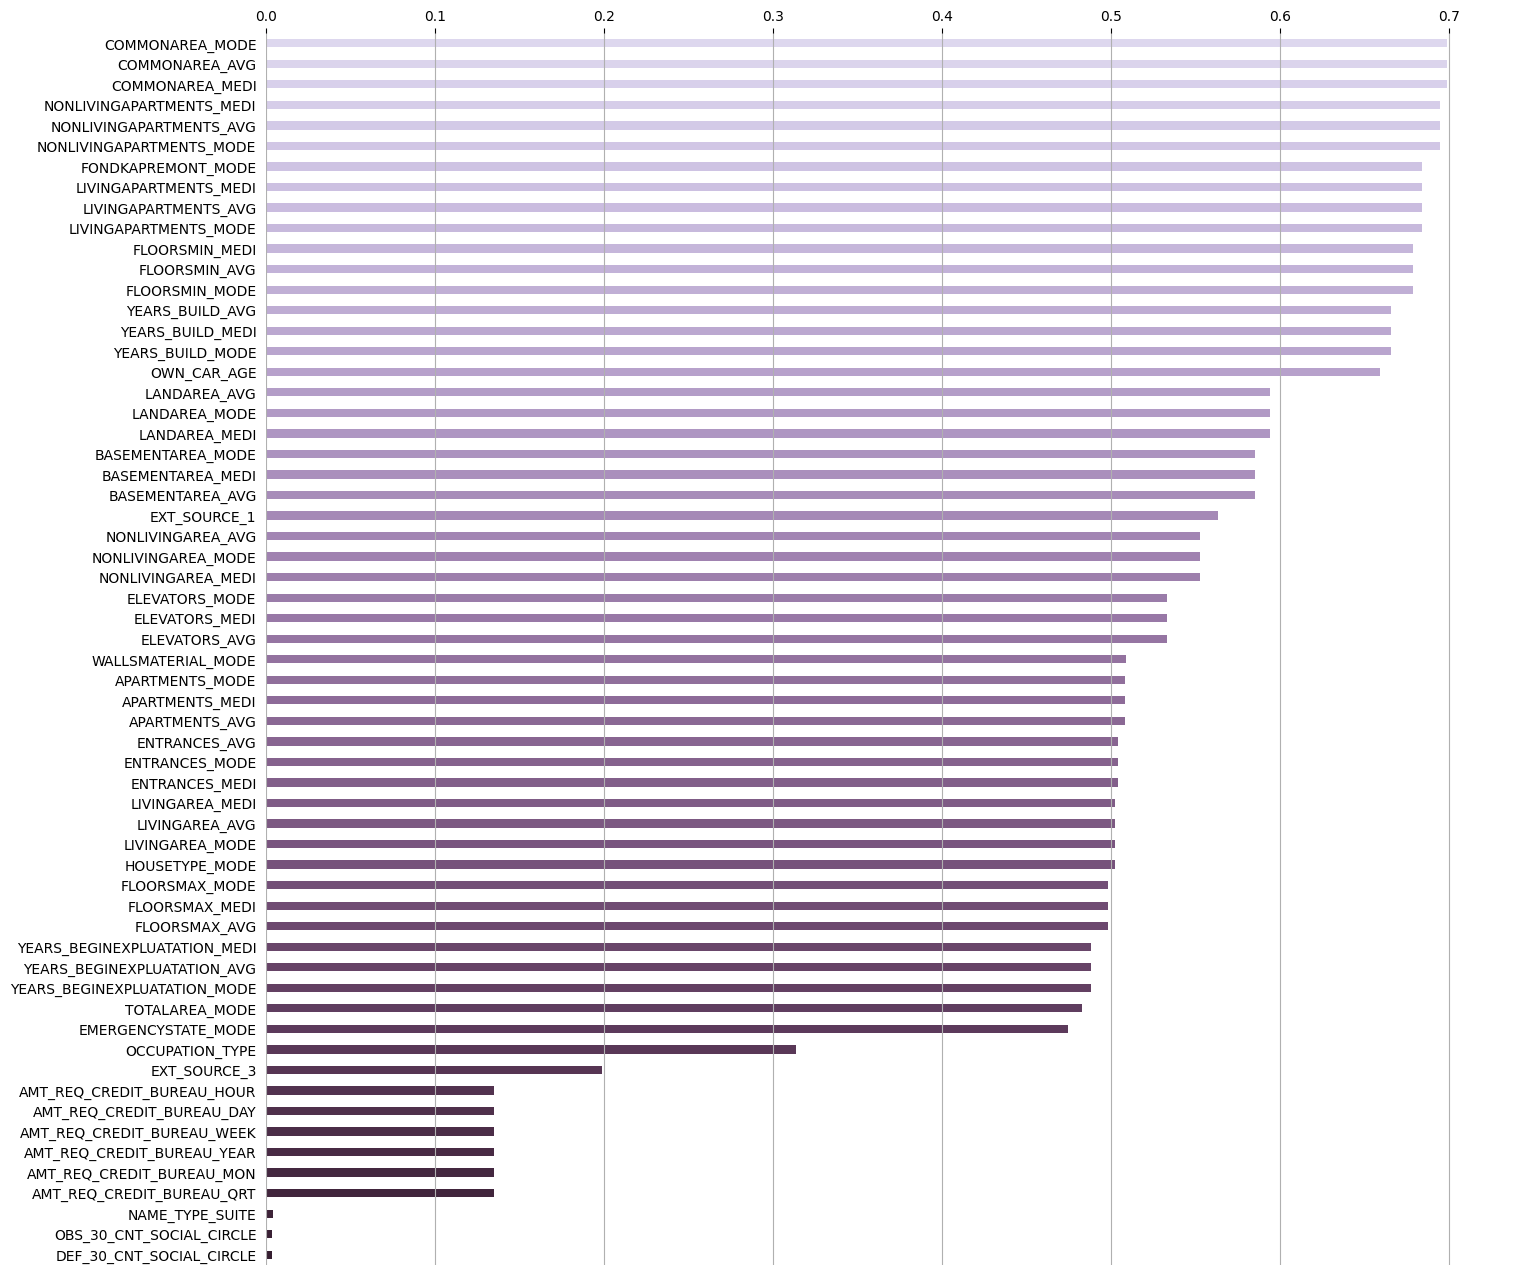

In [99]:
first_sight(app_train, 'app_train')

------------------------------
app_test
------------------------------
	Shape:(61502, 121)
	Duplicate values:0
	First 5 rows:


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M            Y               N             2   
1         Cash loans           F            Y               Y             0   
2         Cash loans           F            Y               N             0   
3         Cash loans           F            N               Y             0   
4         Cash loans           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          207000.0    465457.5      52641.0         418500.0   Unaccompanied   
1          247500.0   1281712.5      48946.5        1179000.0   Unaccompanied   
2          202500.0    495000.0      39109.5         495000.0   Unaccompanied   
3          247500.0    254700.0      24939.0         225000.0   Unaccompanied   
4          112500.0    308133.0      15862.5         234000.0   Unaccompanied   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0   
1  ...                0                0                0   
2  ...                0                0                0   
3  ...                0                0                0   
4  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        1.0   
2                         0.0                        1.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_CURR  
0                        0.0                         1.0       83659  
1                        0.0                         3.0      174814  
2                        0.0                         3.0      179486  
3                        0.0                         0.0       57038  
4                        0.0                         4.0       25672  

[5 rows x 121 columns]

	Features' datatype:


Datatype
NAME_CONTRACT_TYPE           object
CODE_GENDER                  object
FLAG_OWN_CAR                 object
FLAG_OWN_REALTY              object
CNT_CHILDREN                  int64
...                             ...
AMT_REQ_CREDIT_BUREAU_WEEK  float64
AMT_REQ_CREDIT_BUREAU_MON   float64
AMT_REQ_CREDIT_BUREAU_QRT   float64
AMT_REQ_CREDIT_BUREAU_YEAR  float64
SK_ID_CURR                    int64

[121 rows x 1 columns]

	Features' descriptive statistics:


count           mean            std      min  \
CNT_CHILDREN                61502.0       0.420344       0.727919      0.0   
AMT_INCOME_TOTAL            61502.0  170154.098971  487270.629522  26100.0   
AMT_CREDIT                  61502.0  596566.043747  400046.283779  45000.0   
AMT_ANNUITY                 61500.0   27061.917220   14425.973334   1980.0   
AMT_GOODS_PRICE             61448.0  536050.186149  367008.098373  45000.0   
...                             ...            ...            ...      ...   
AMT_REQ_CREDIT_BUREAU_WEEK  53194.0       0.034966       0.206076      0.0   
AMT_REQ_CREDIT_BUREAU_MON   53194.0       0.270388       0.932013      0.0   
AMT_REQ_CREDIT_BUREAU_QRT   53194.0       0.259691       0.607831      0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  53194.0       1.895364       1.865405      0.0   
SK_ID_CURR                  61502.0  154452.964668   88795.395500      5.0   

                                 25%       50%       75%          max  
CNT_CHILDREN                     0.0       0.0       1.0         12.0  
AMT_INCOME_TOTAL            112500.0  148500.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  509922.0  808650.0    4050000.0  
AMT_ANNUITY                  16582.5   24903.0   34465.5     230161.5  
AMT_GOODS_PRICE             238500.0  450000.0  679500.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          6.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         22.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         23.0  
SK_ID_CURR                   77320.5  155288.5  231358.0     307508.0  

[105 rows x 8 columns]

	Features' NaN values::
Number of columns having NaN values: 66 columns


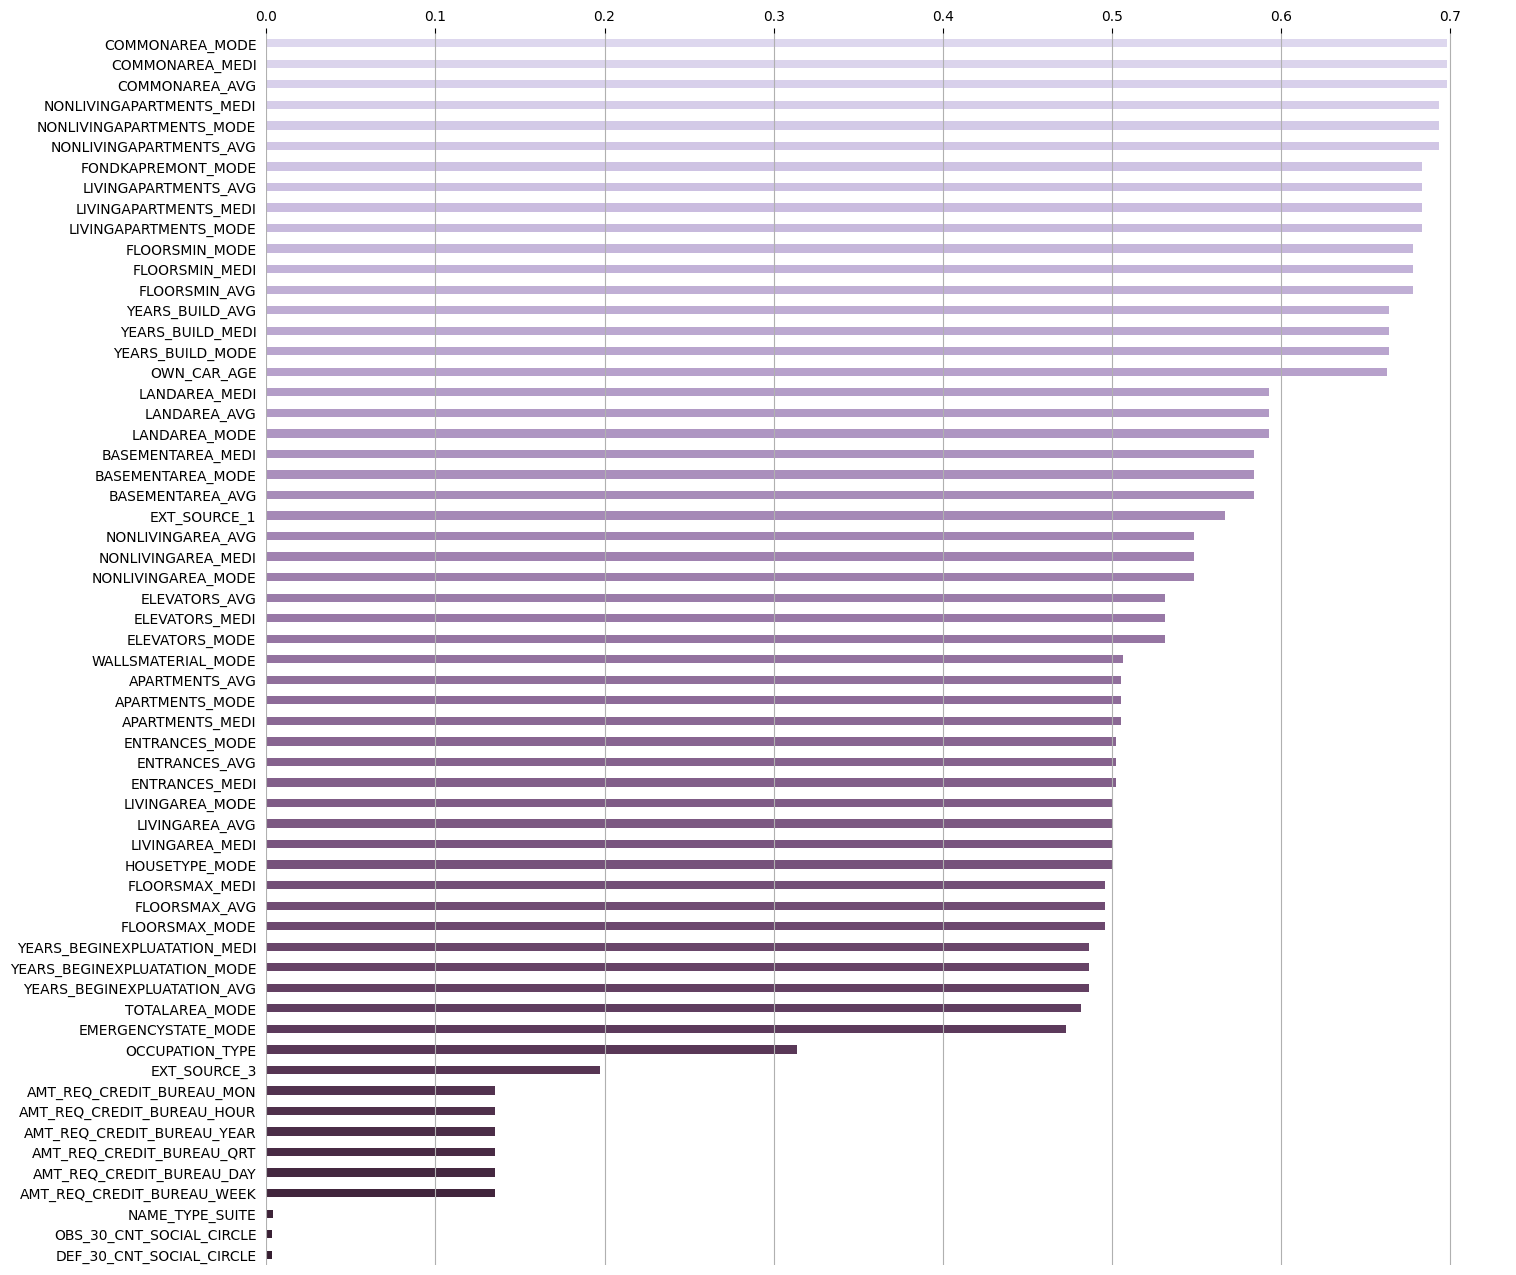

In [100]:
first_sight(app_test, 'app_test')

## Categorical Variables

NAME_CONTRACT_TYPE

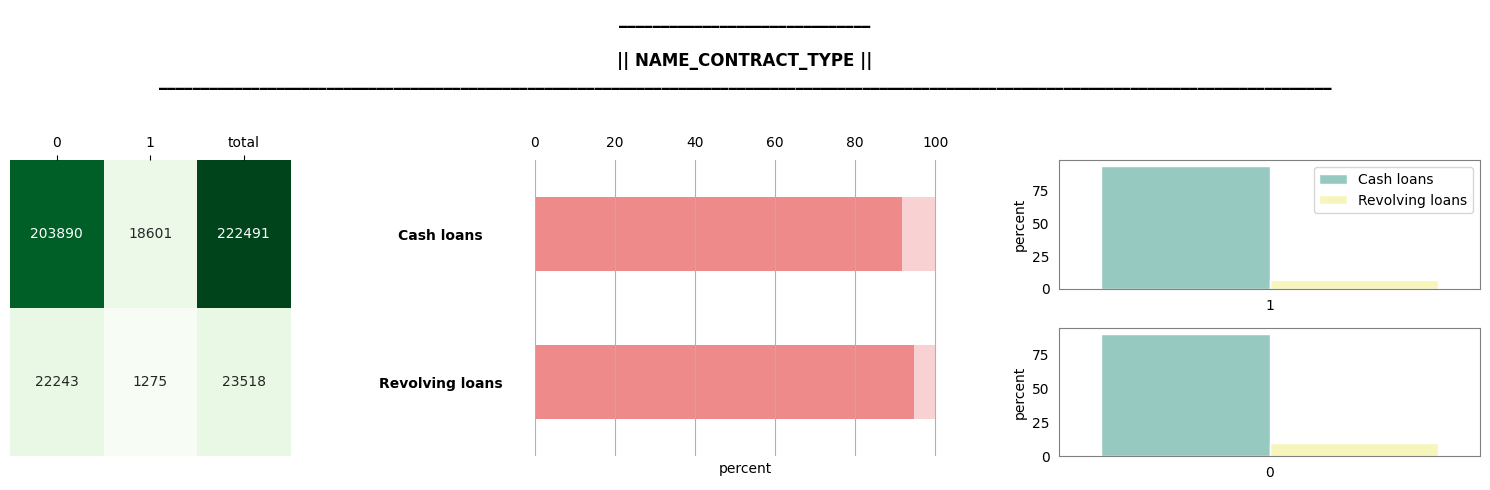

In [142]:
cat_visual(app_train,'NAME_CONTRACT_TYPE')

- It can be seen that most of the loans that the customers take are Cash Loans. Only 10% of the people have taken Revolving Loans
- There are more percentage of people who have defaulted with Cash Loans as compared to those who defaulted with Revolving Loans, however this difference is not significant.
- Imbalance data

CODE_GENDER

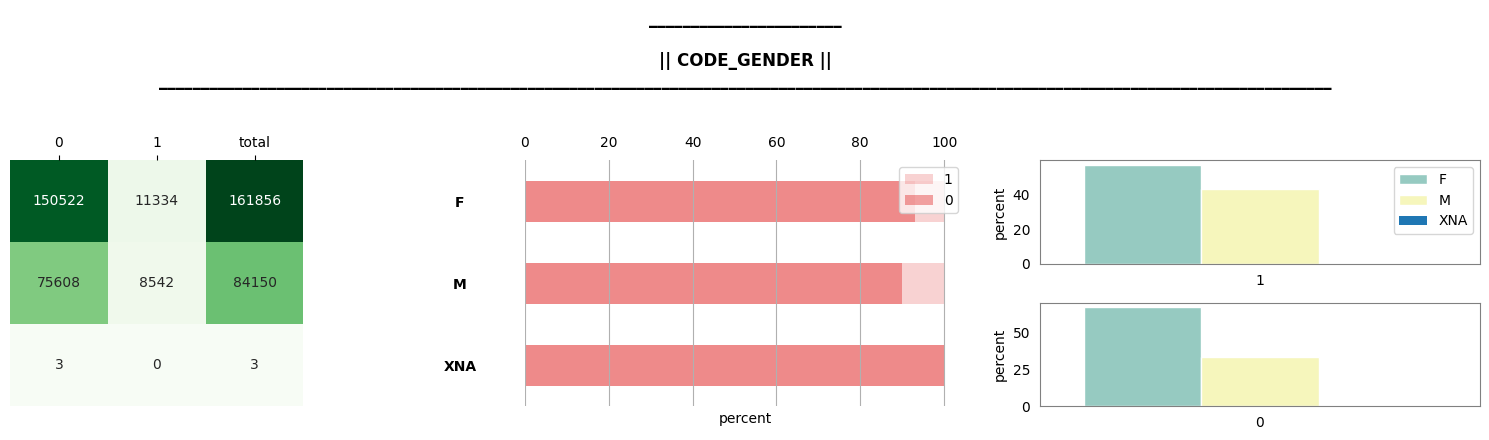

In [120]:
cat_visual(app_train,'CODE_GENDER')

- The number of 'XNA' genders are very low, which dont make much sense, and can be counted as NaN values
- There are more number of Female applicants than Male applicants.
- However, contrary to the number of Female applicants, from the second plot we note that it has been seen that Male applicants tend to default more as compared to Female applicants.

NAME_INCOME_TYPE

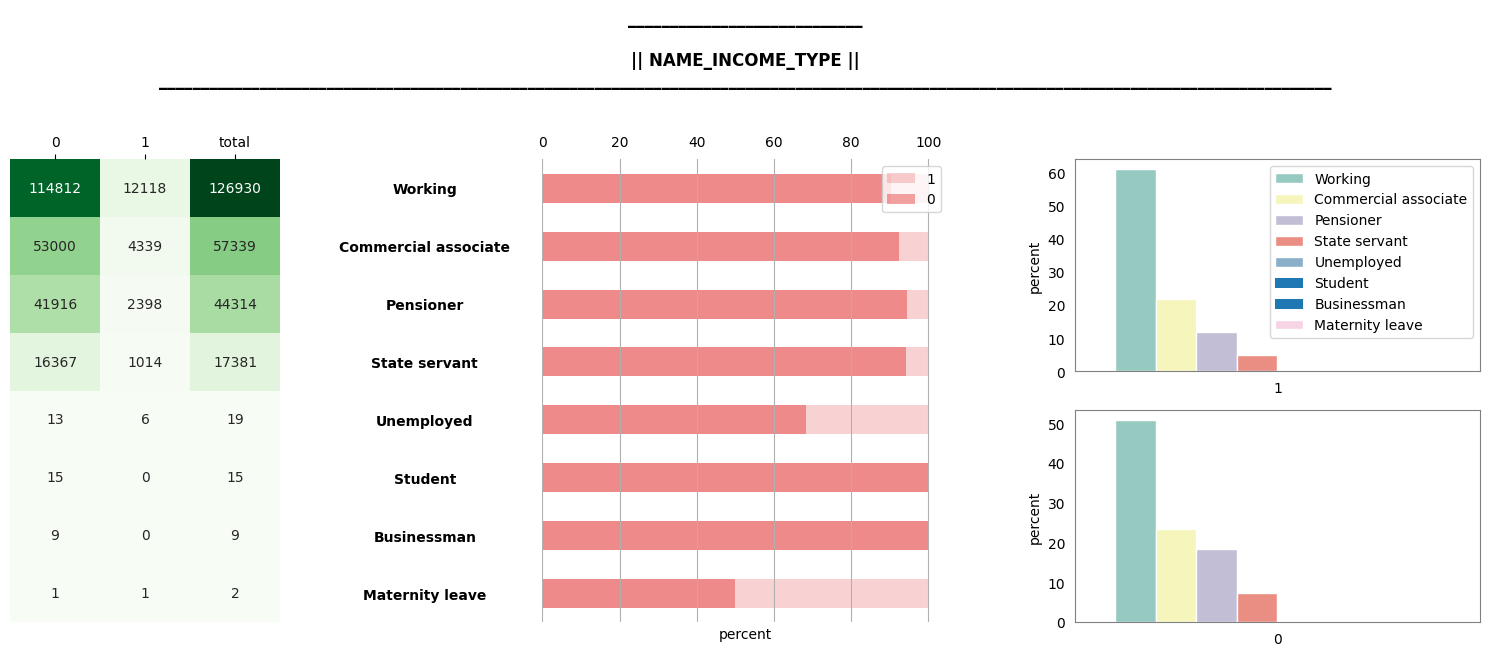

In [125]:
cat_visual(app_train, 'NAME_INCOME_TYPE')

- Most of the researched clients have an income type of 'Working'
- There are only 19 unemployed people in the train set, however, the percentage of default among these categories is quite high (right after the category of 'Maternity leave', which only have 2 people so it is understandable)

NAME_EDUCATION_TYPE

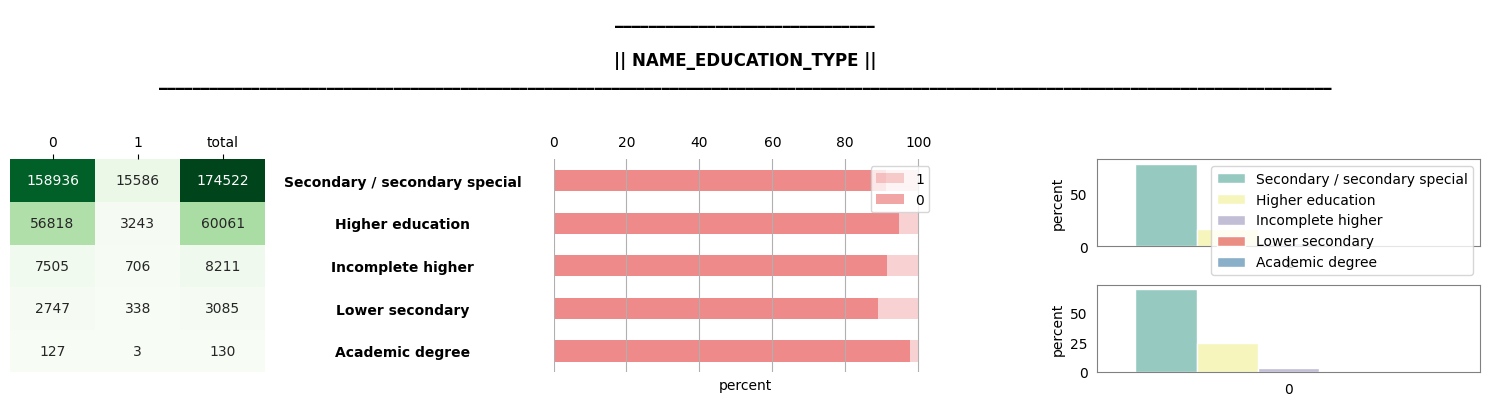

In [126]:
cat_visual(app_train,'NAME_EDUCATION_TYPE')

- About 174,522 of people have had their education only till Secondary/Secondary Special, along with 60,061 clients having done Higher Education. This suggests that most of the clients/borrowers don't have a high education level.
- The people who have had their studies till only Lower Secondary have the highest defaulting characteristics, with Secondary and Incomplete higher having similar defaulting tendencies.
- The group of people with Higher Education have comparably lower defaulting tendencies, which is logical too. Also, people with Academic Degrees show the least Defaulting Rate. However, the Academic Degree group í very few, so it might not be very useful.

NAME_HOUSING_TYPE

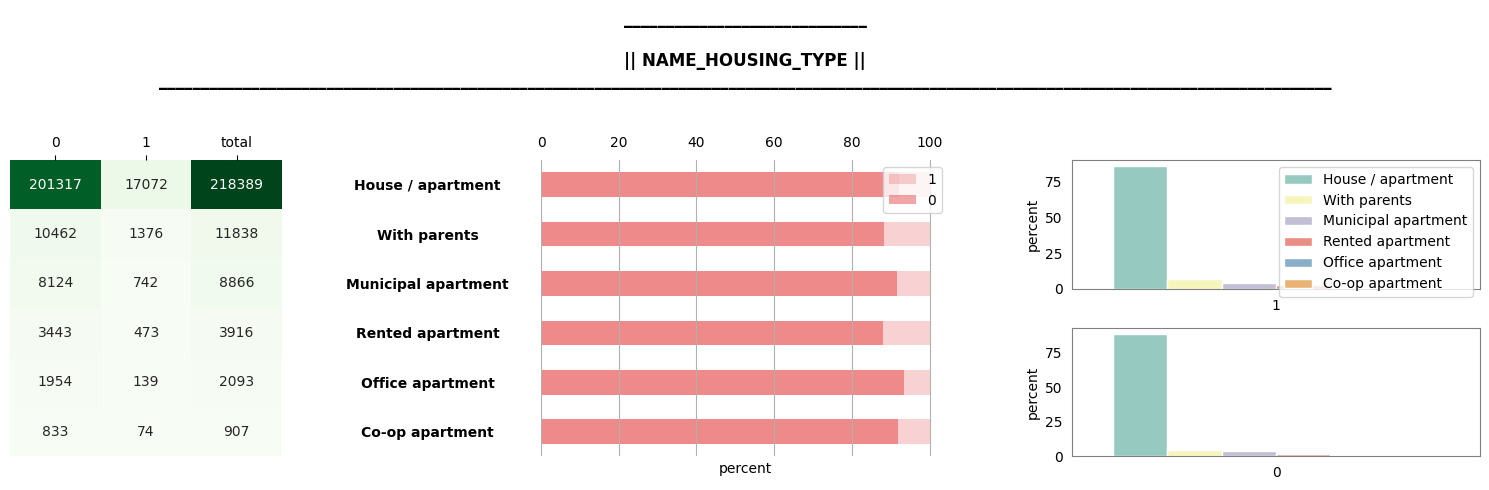

In [128]:
cat_visual(app_train,'NAME_HOUSING_TYPE')

- Most of the clients have a house/ apartment, followed by staying with parents
- People with rented apartment have the largest percentage of default, which is understandable because they usually don't have strong financial ability and barely a financial helper 
- Imbalance data

PROCESS START: WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START

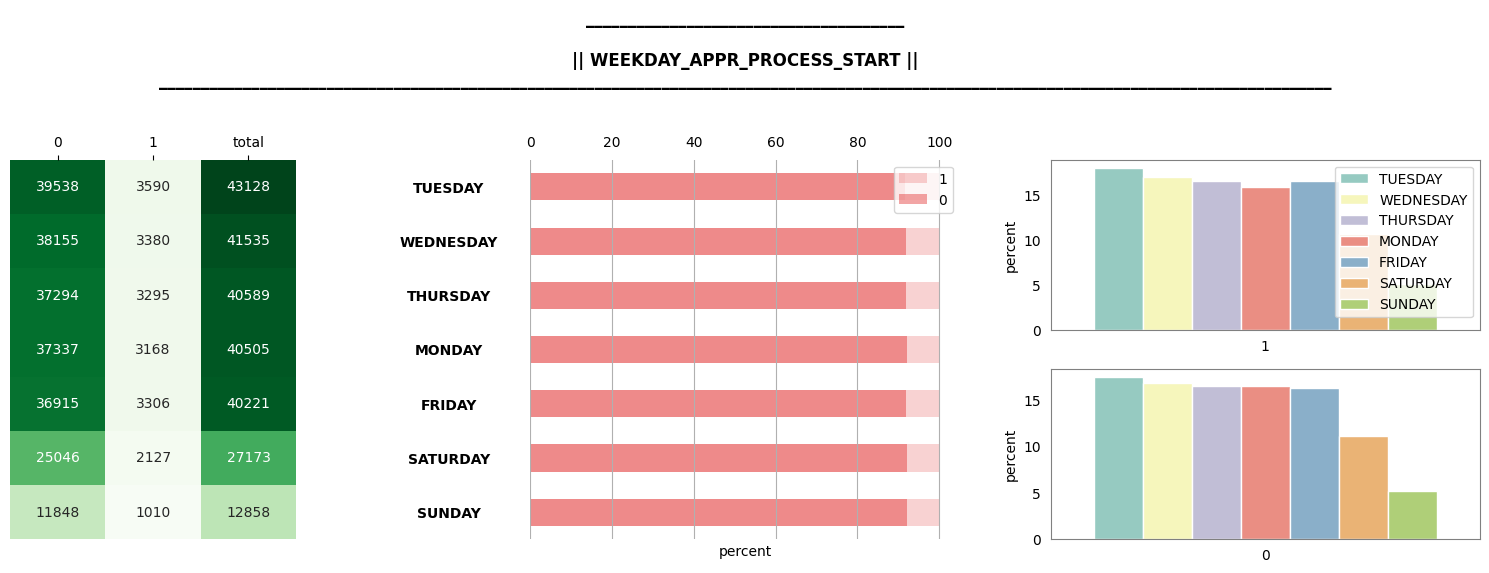

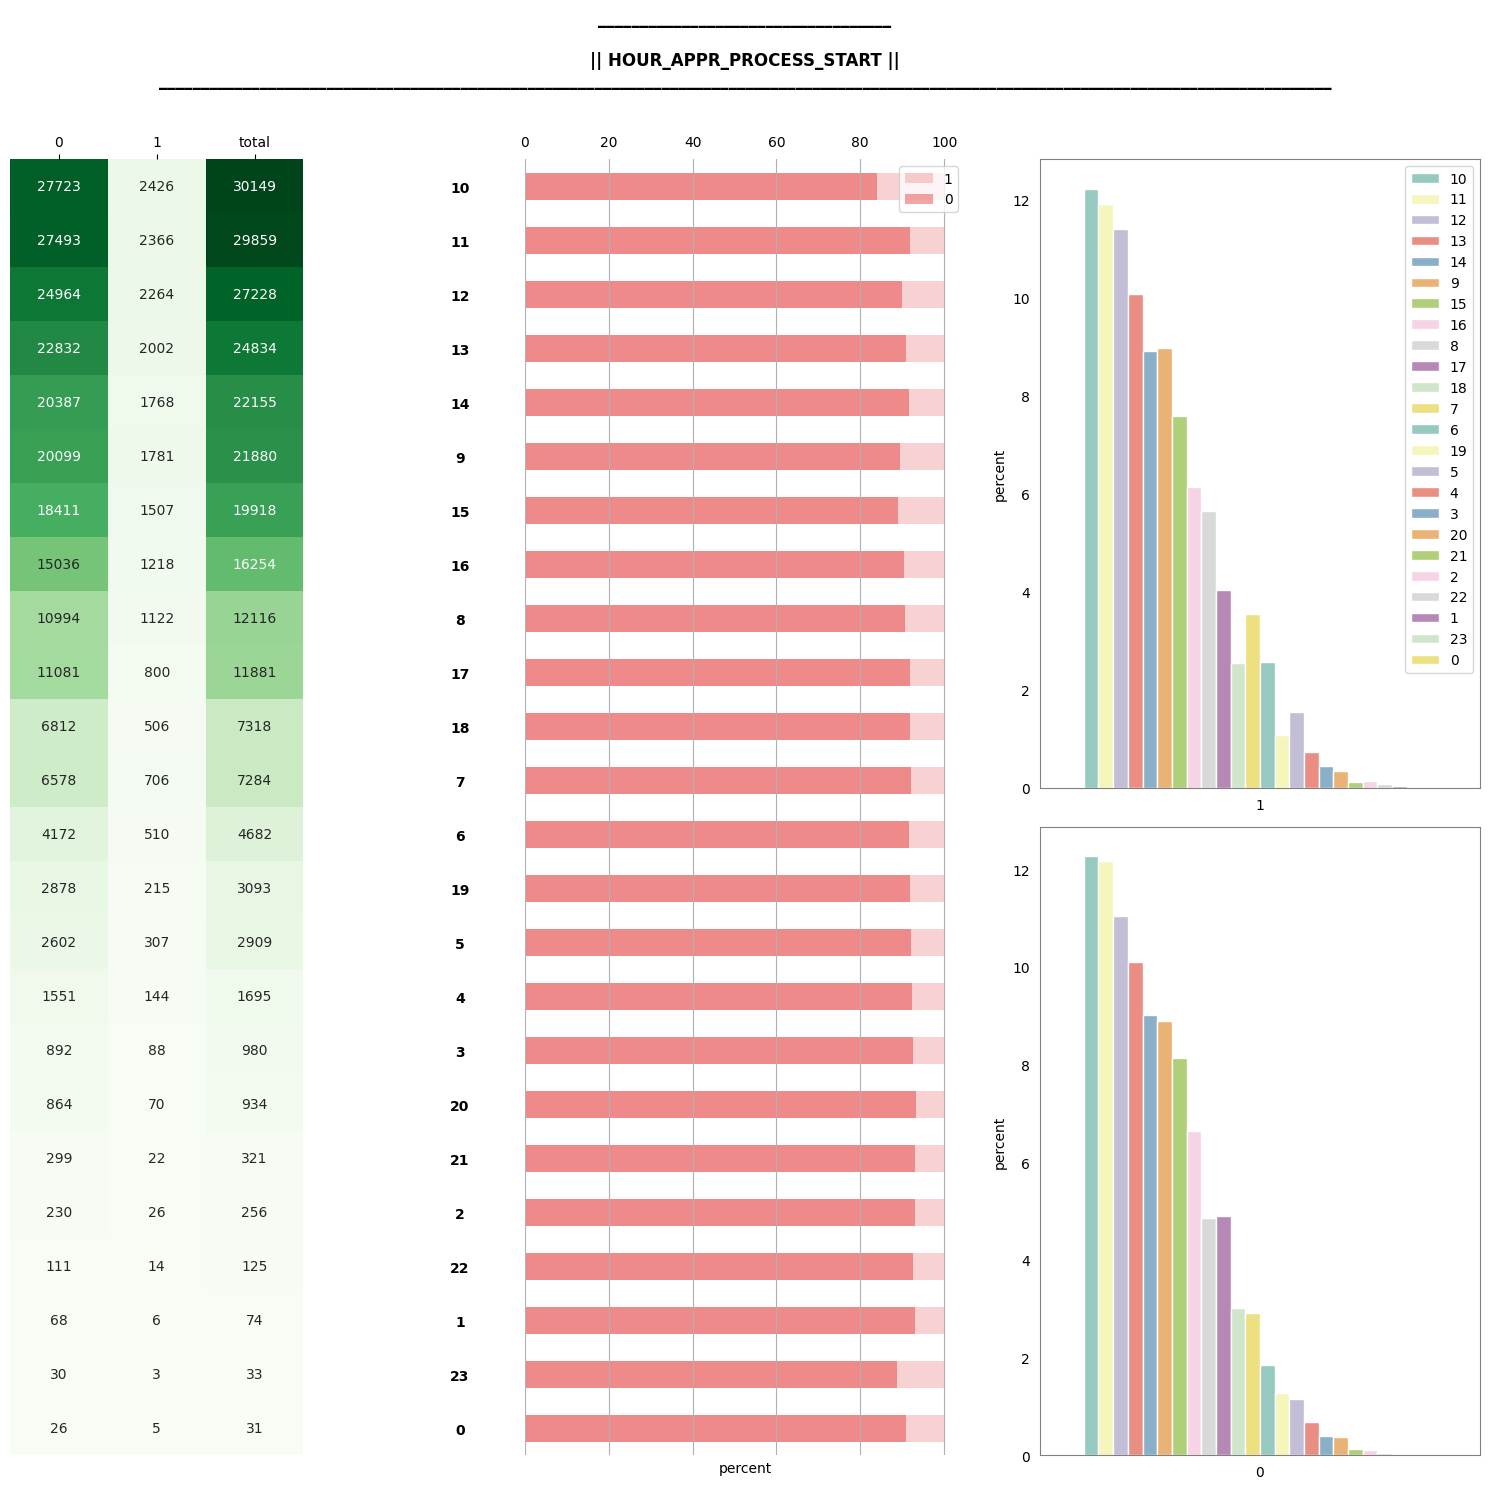

In [133]:
pro_start  = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'] #onehot
for col in pro_start:
    cat_visual(app_train,col)

- kinda random
- barely any correlation with target 

OCCUPATION_TYPE

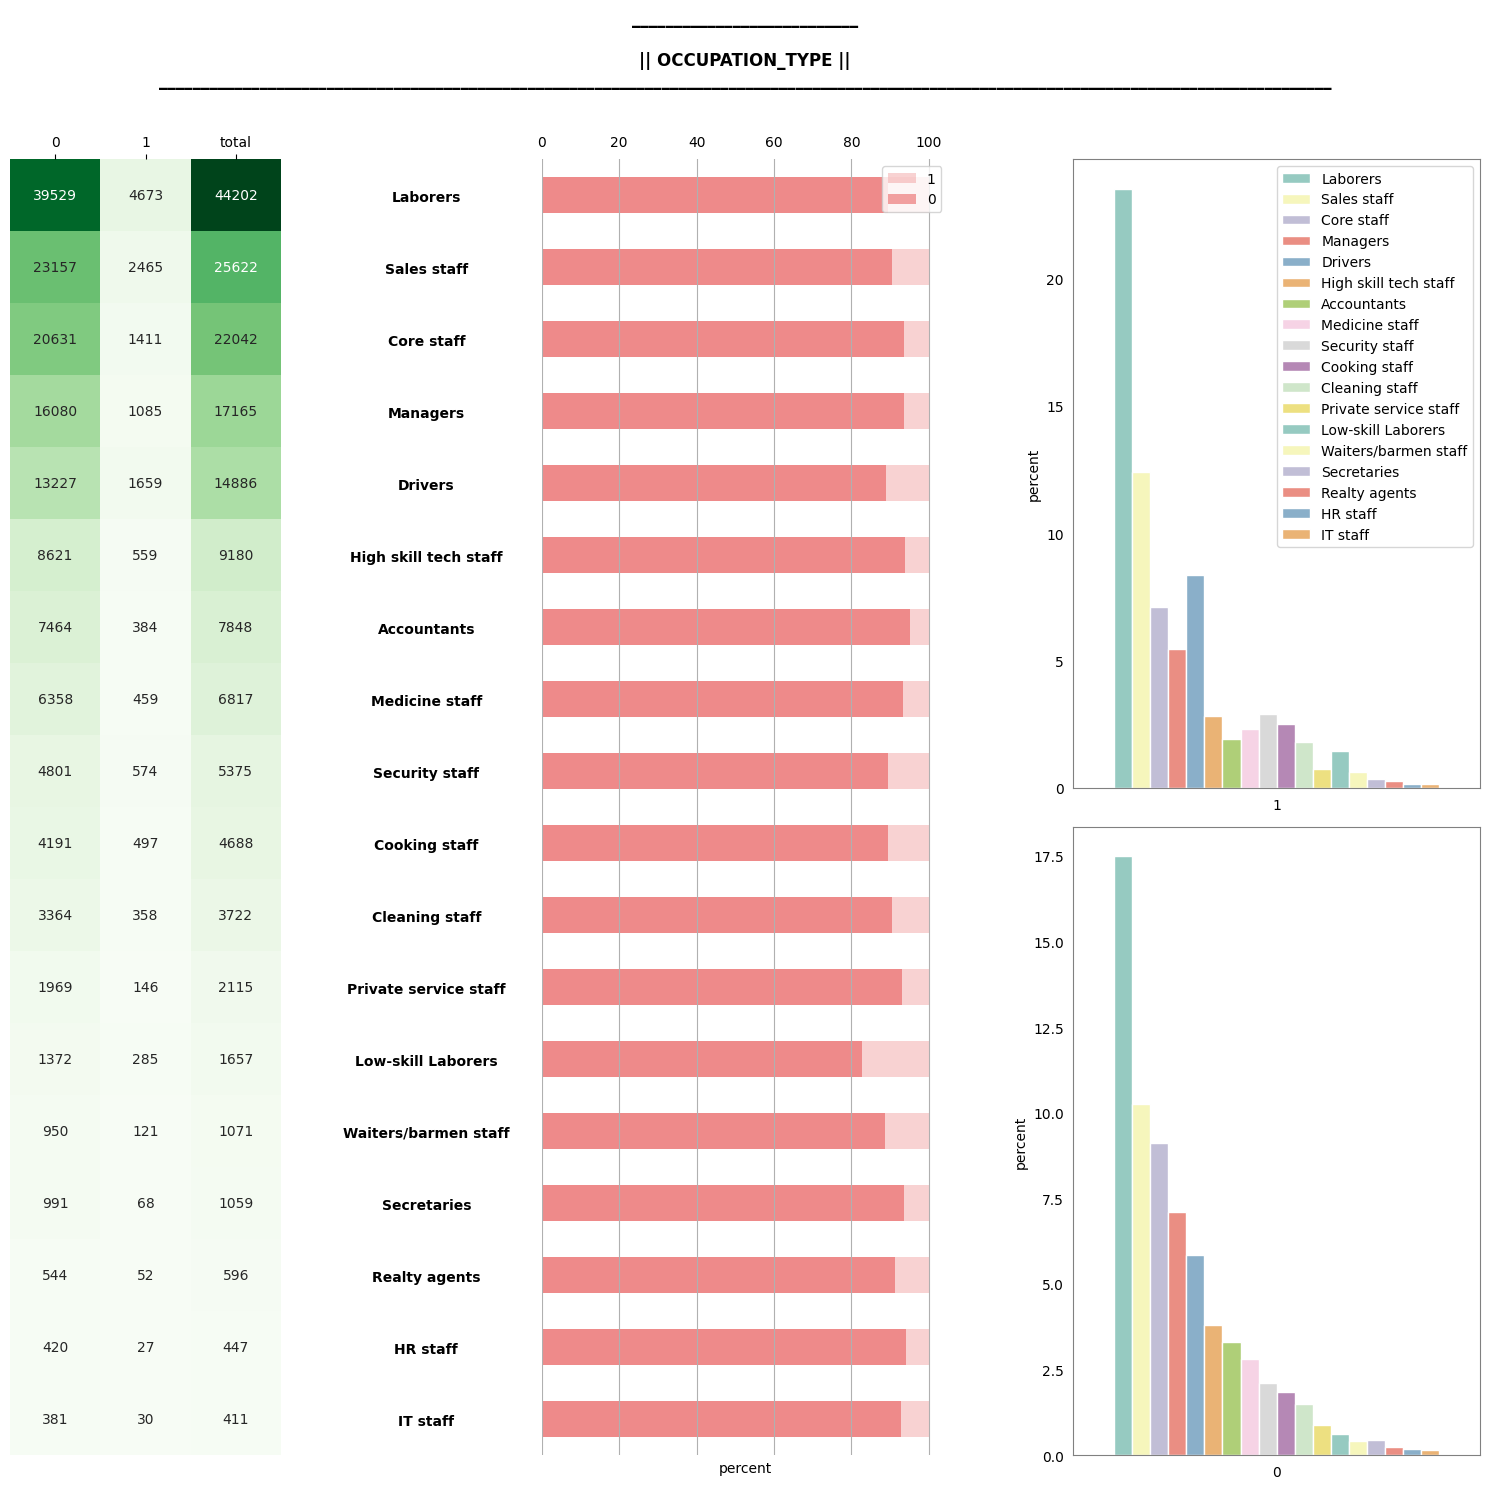

In [134]:
cat_visual(app_train,'OCCUPATION_TYPE')

- Among the applicants, the most common type of Occupation is Laborers. The next most frequent occupation is Sales Staff, followed by Core Staff and Managers.
- The Defaulting Rate for Low-Skill Laborers is the highest among all the occupation types. This is followed by Drivers, Waiters, Security Staff, Laborers, Cooking Staff, etc. All the jobs are low-level jobs. This shows that low-level Jobs people tend to have higher default rate.
- The lowest Defaulting Rate are among Accountants, Core Staff, Managers, High skill tech staff, HR staff, etc. which are from medium to high level jobs.
- Thus it can be concluded that Low-level job workers tend to have a higher defaulting tendency compared to medium-high level jobs.

ORGANIZATION_TYPE

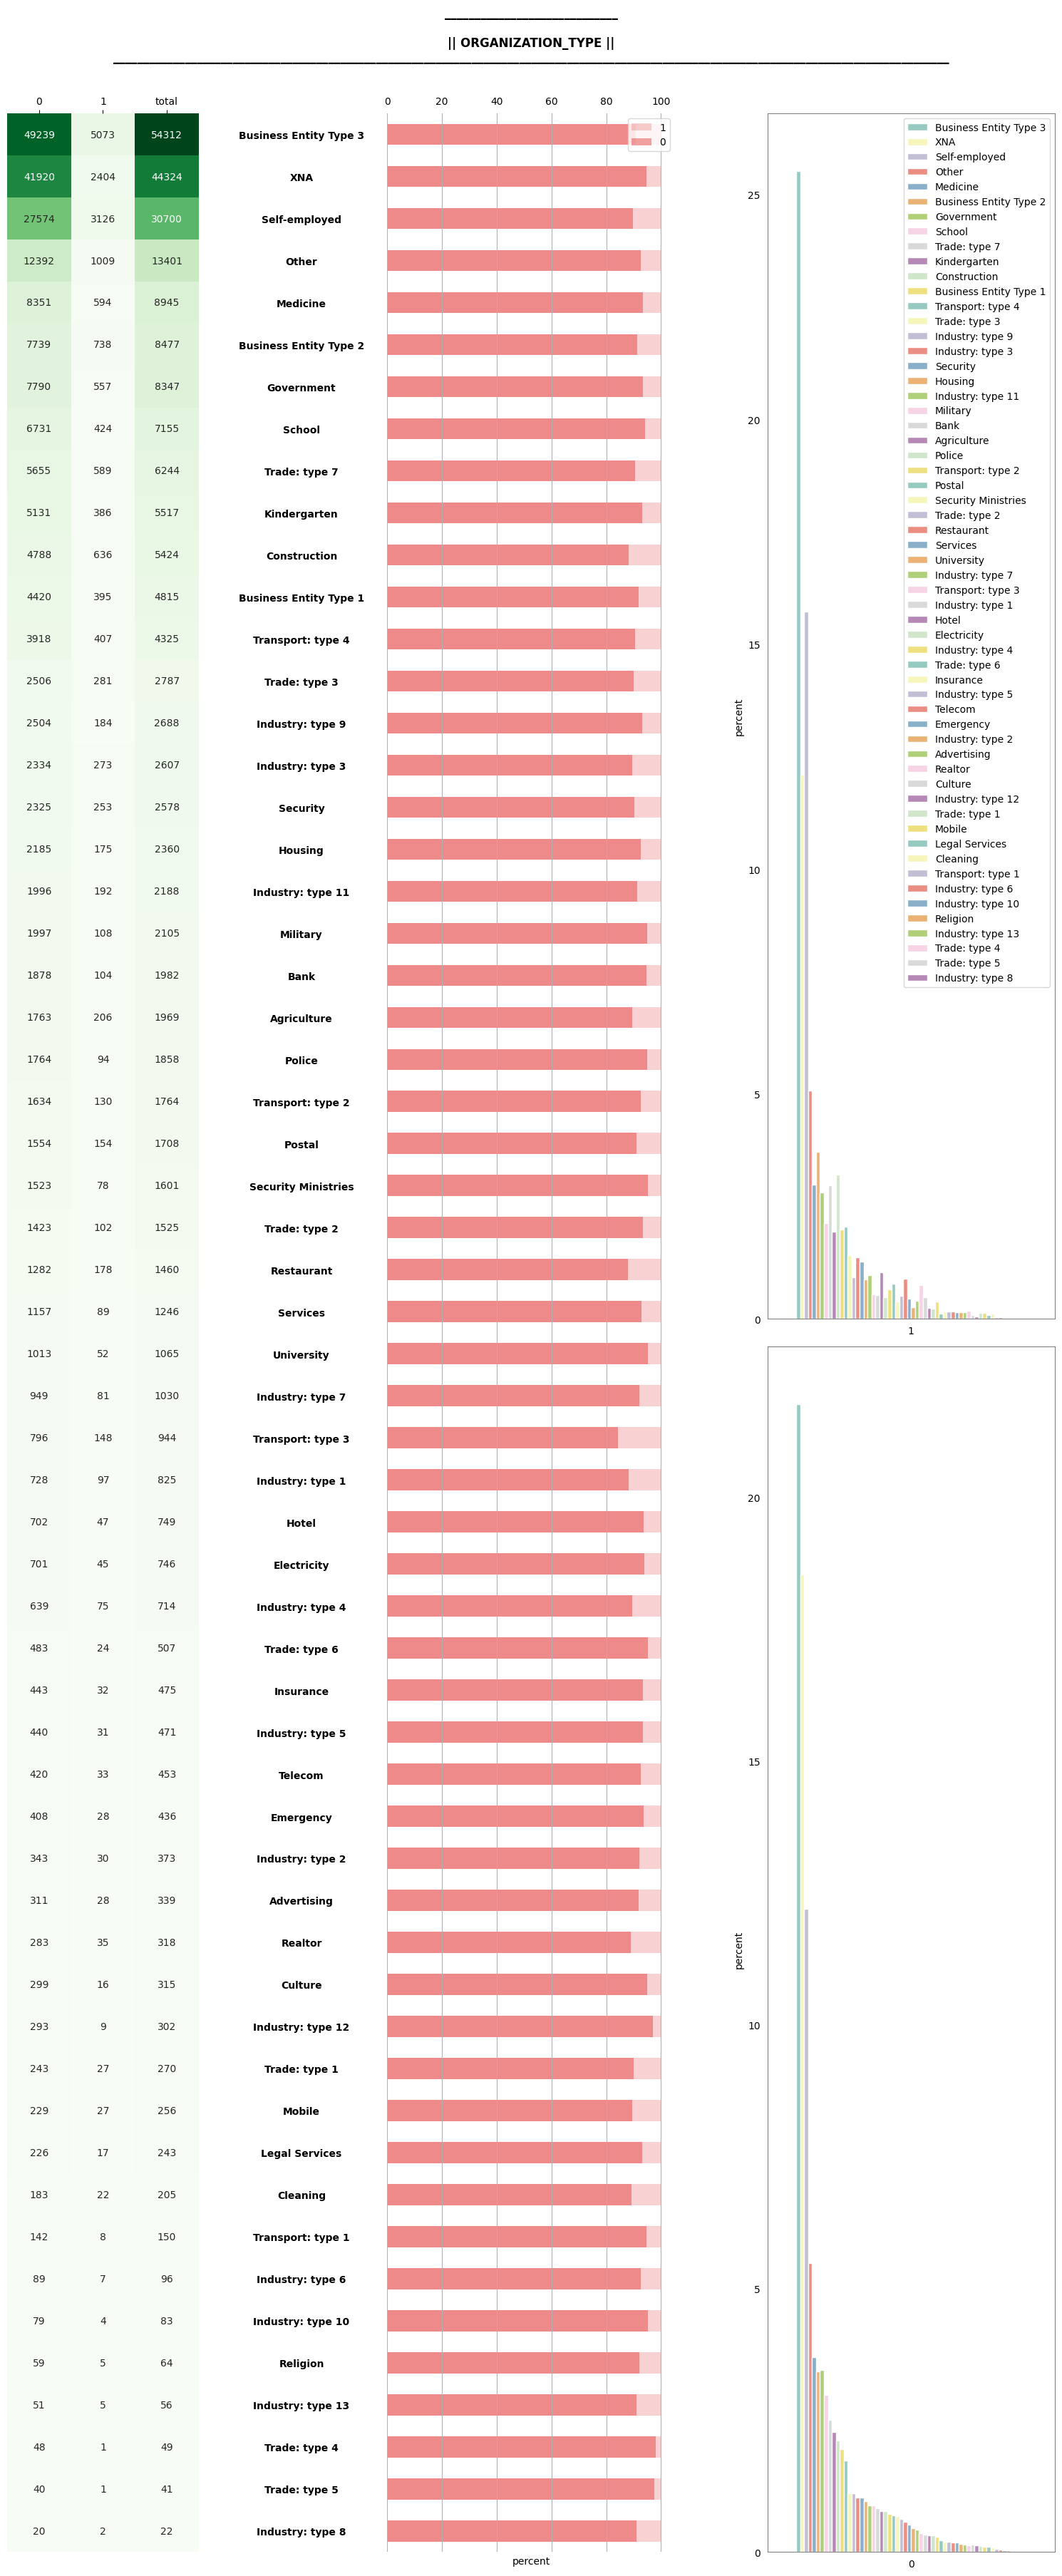

In [135]:
cat_visual(app_train,'ORGANIZATION_TYPE')

- Most of the applicants work in Organizations of Type 'Business Entity Type3', 'XNA' or 'Self Employed'. The Organization Type 'XNA' could probably denote unclassified Organization TYpe.
- The applicants belonging to 'Transport: type 3' have the highest defaulting tendency as compared to the rest. They are followed by organizations of types: 'Industry: type 13', 'Industry: type 8', 'Restaurant', 'Construction', etc.
- The organizations which show lowest default rates are 'Trade: type 4', 'Industry: type 12', etc.

REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY

- REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY:
These columns include flags whether if the the client's permanent address matches with his Contact Address or Work Address or not at region level

- LIVE_CITY_NOT_WORK_CITY This column indicates whether if the client's permanent address matches with his Contact Address at city level or not.

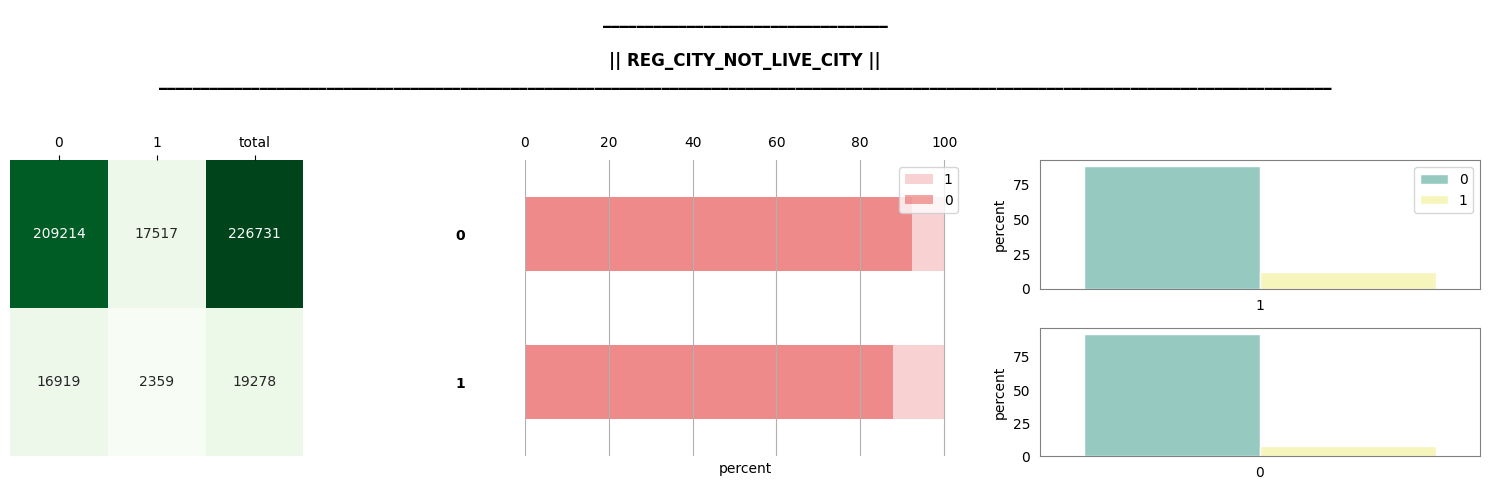

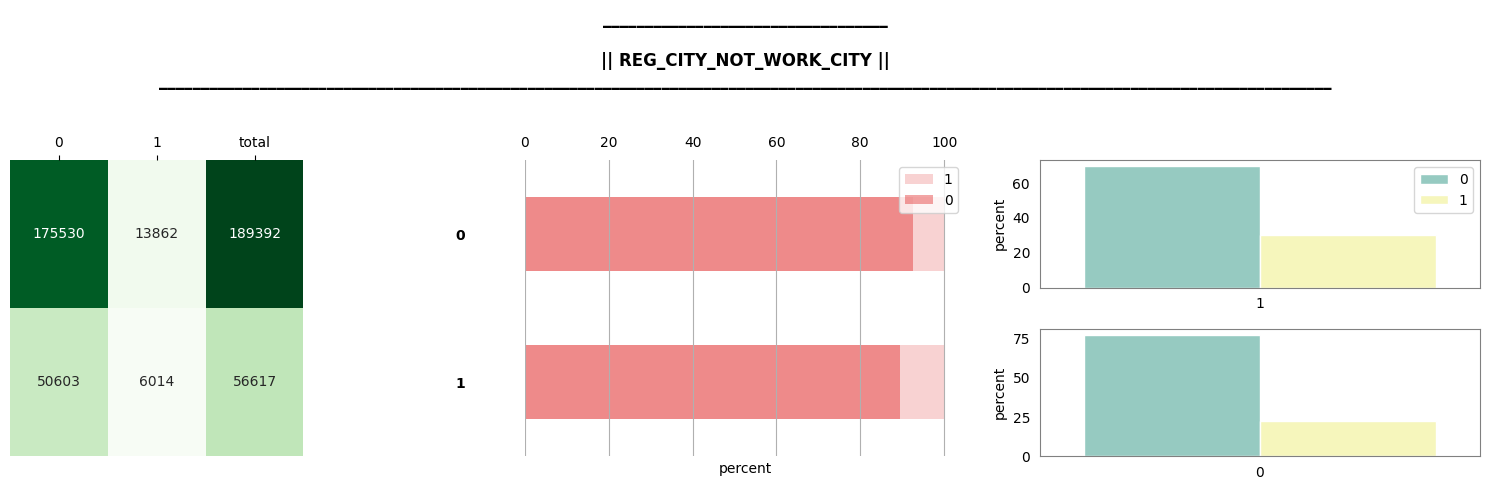

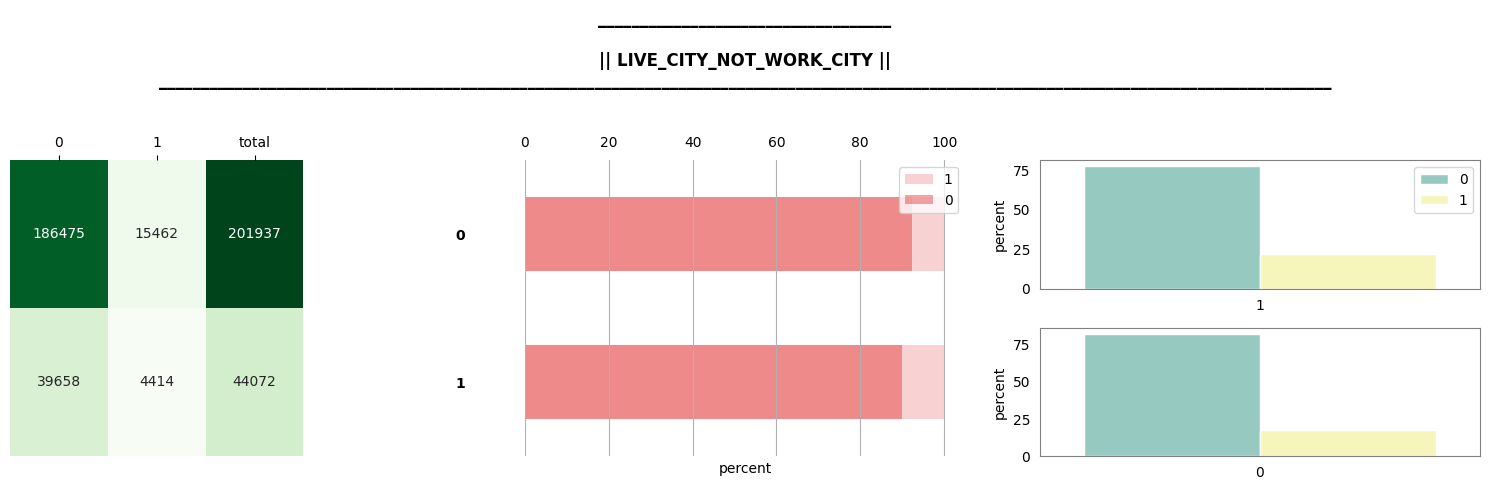

In [136]:
city = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
for c in city:
    cat_visual(app_train,c)

- For all the cases it is seen that the Defaulting tendency of those people who have different addresses is higher than those who have same address. This means that somewhere, this difference in address may suggest Defaulting Risk.

REGION

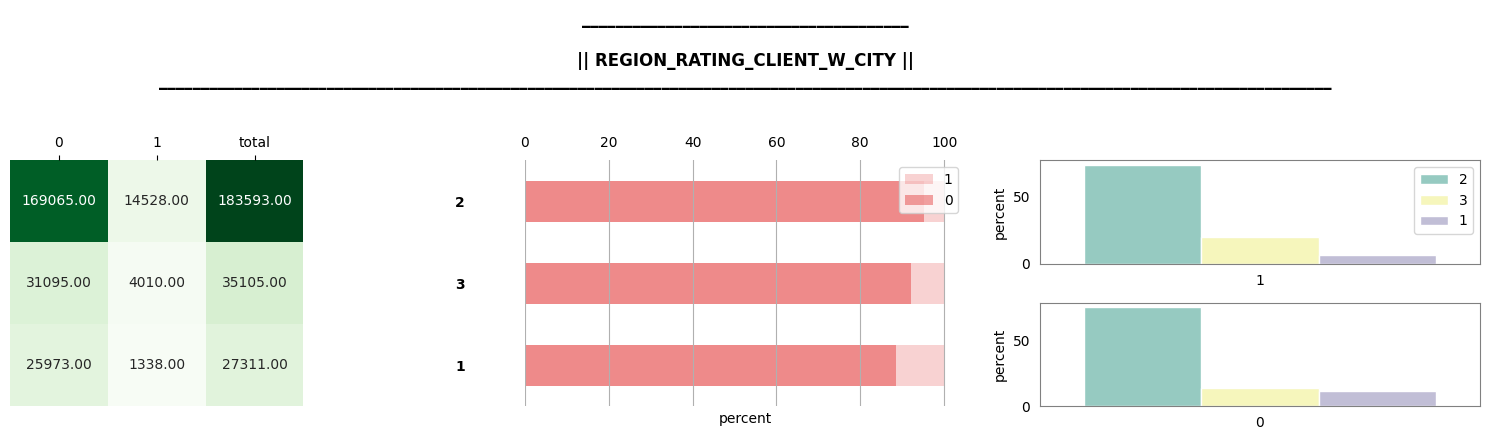

In [190]:
cat_visual(app_train,'REGION_RATING_CLIENT_W_CITY')

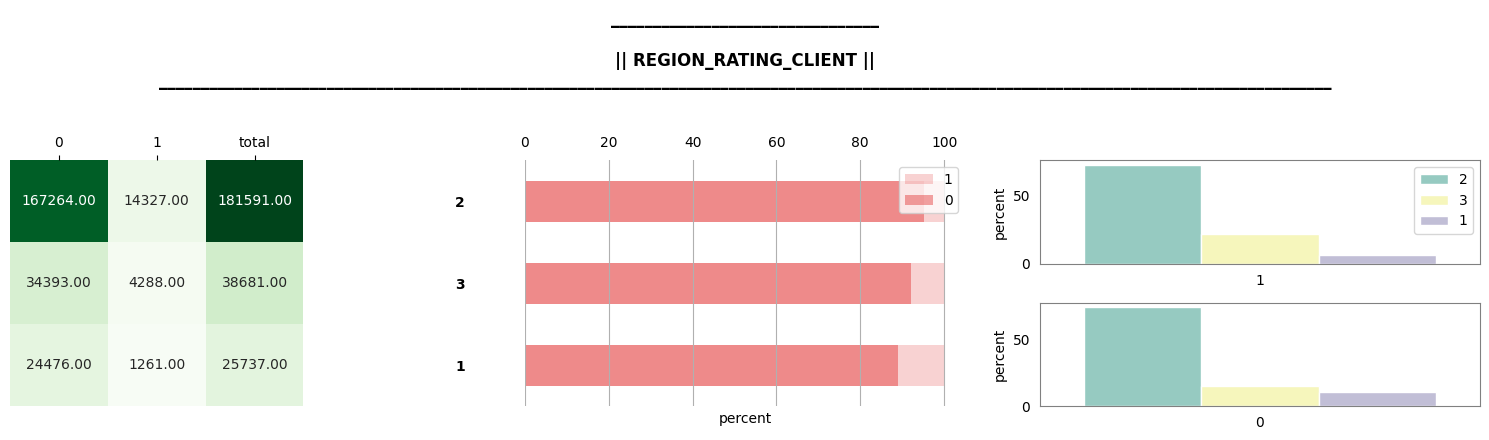

In [191]:
cat_visual(app_train,'REGION_RATING_CLIENT')

For both features, we can see that although there are a large amount of research clients who live in region that labels "2", people who live in region "1" have the largest probability to default

FLAG_DOCUMENT_3

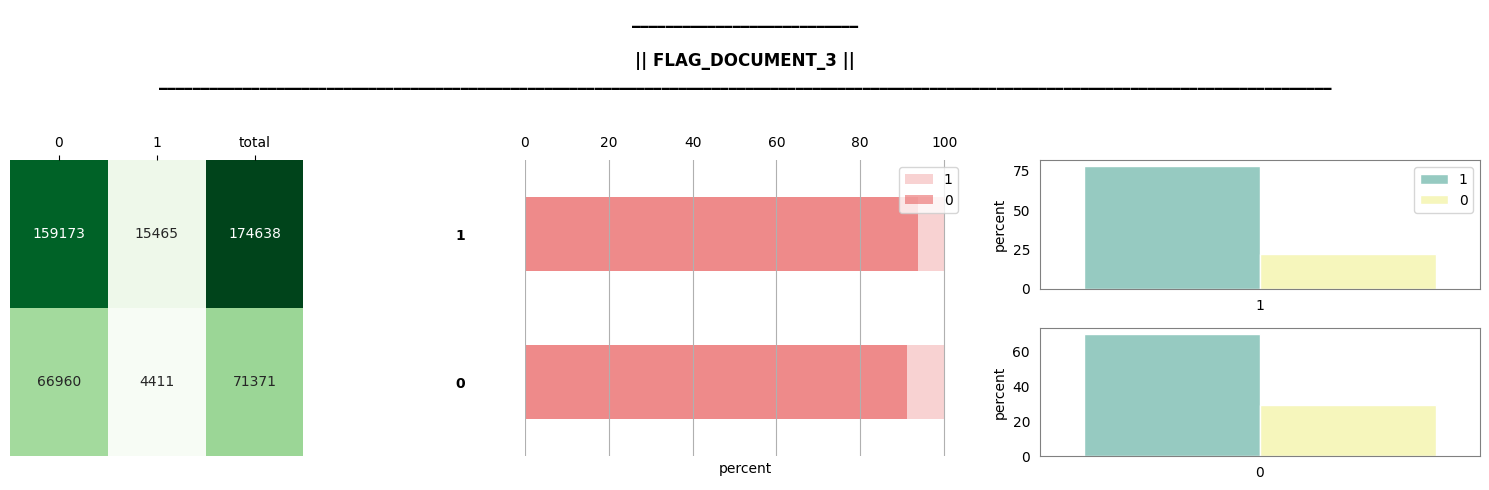

In [137]:
cat_visual(app_train, 'FLAG_DOCUMENT_3')

- Most of the clients hadn't provided this document (~71%) and only 29% did.
- Those who had provided this document had a higher defaulting rate than those who didn't. This means that the applicants who had provided the Document_3 tend to default more than those who don't.

## Continuous Variables

In [138]:
corr = pd.DataFrame(app_train.select_dtypes(['int','float']).corr()).fillna(0)

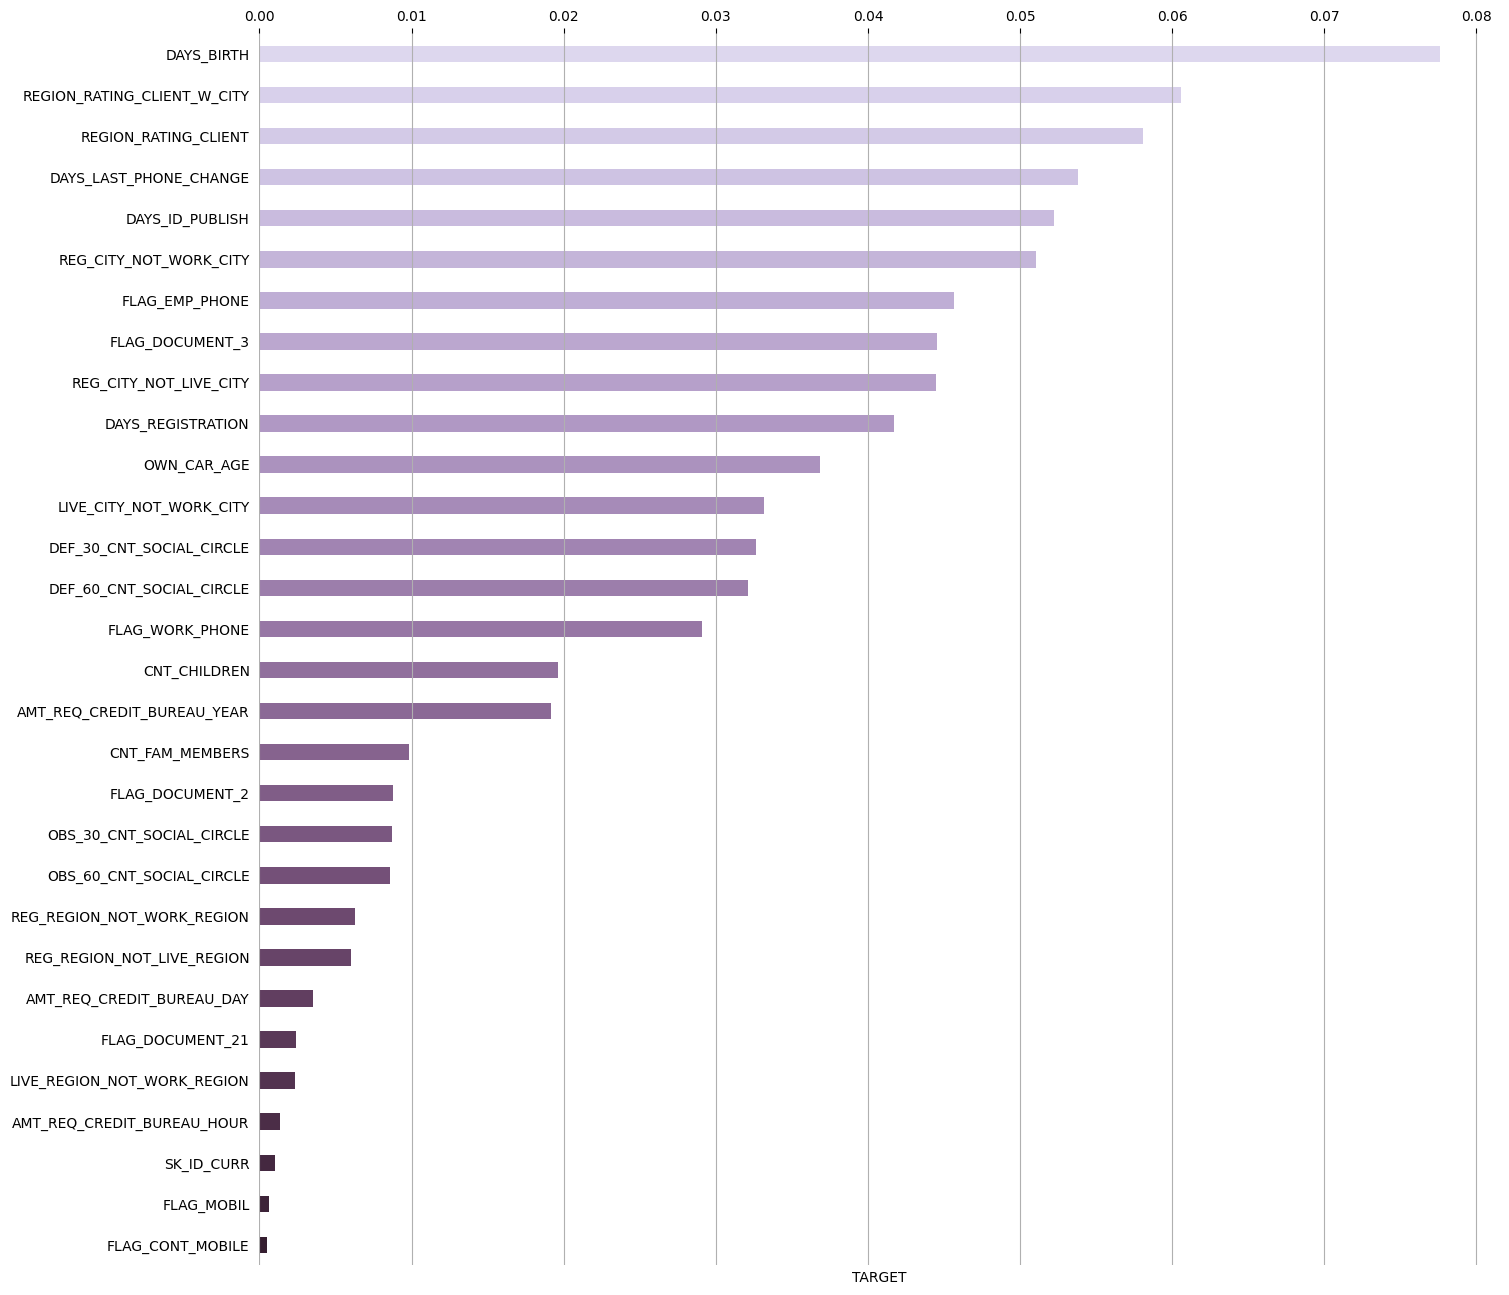

In [155]:
top_corr(corr)

Social Circle: OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE

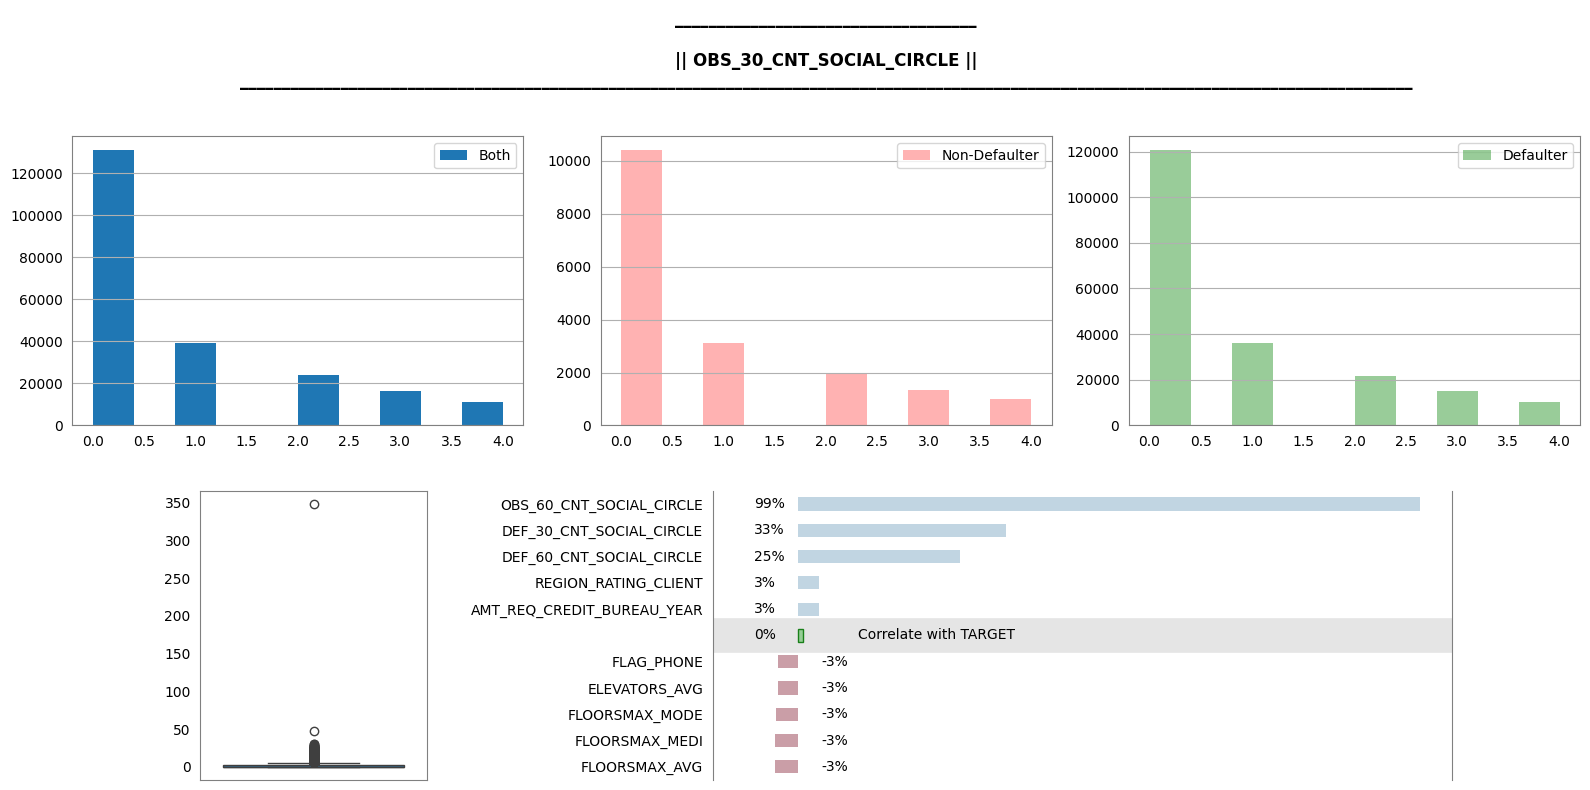

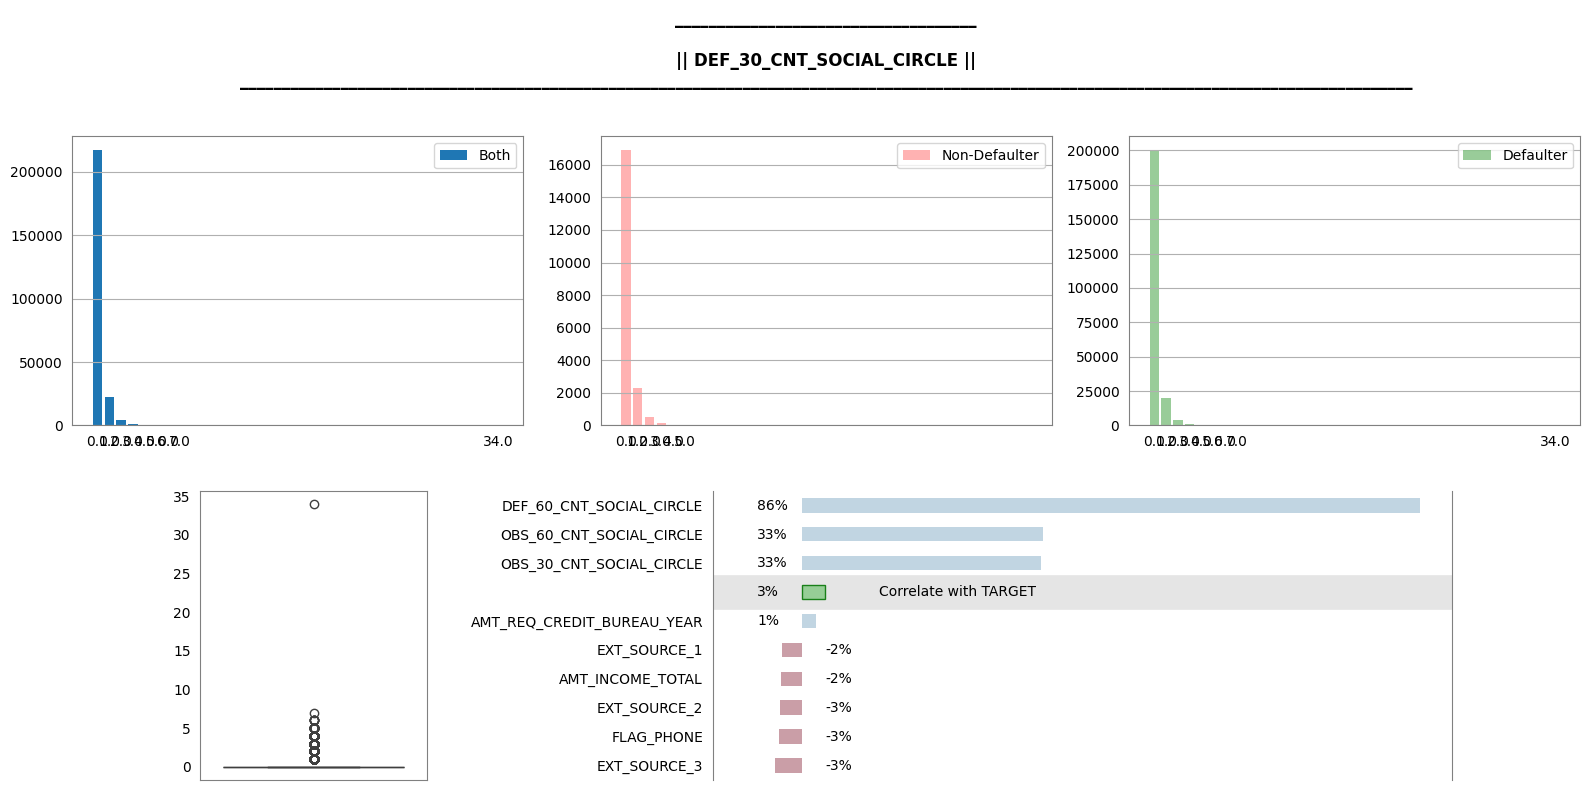

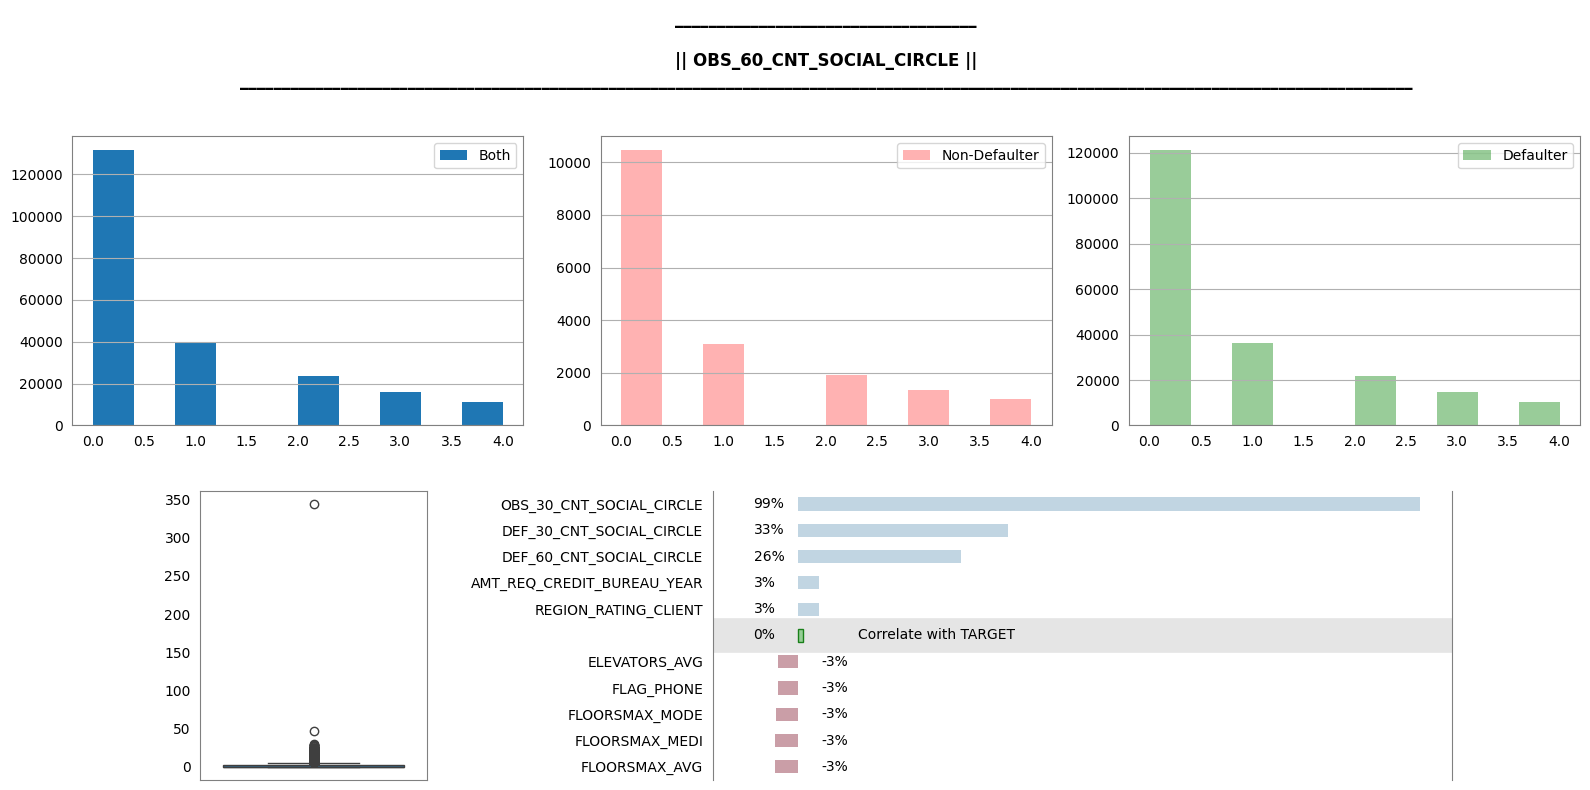

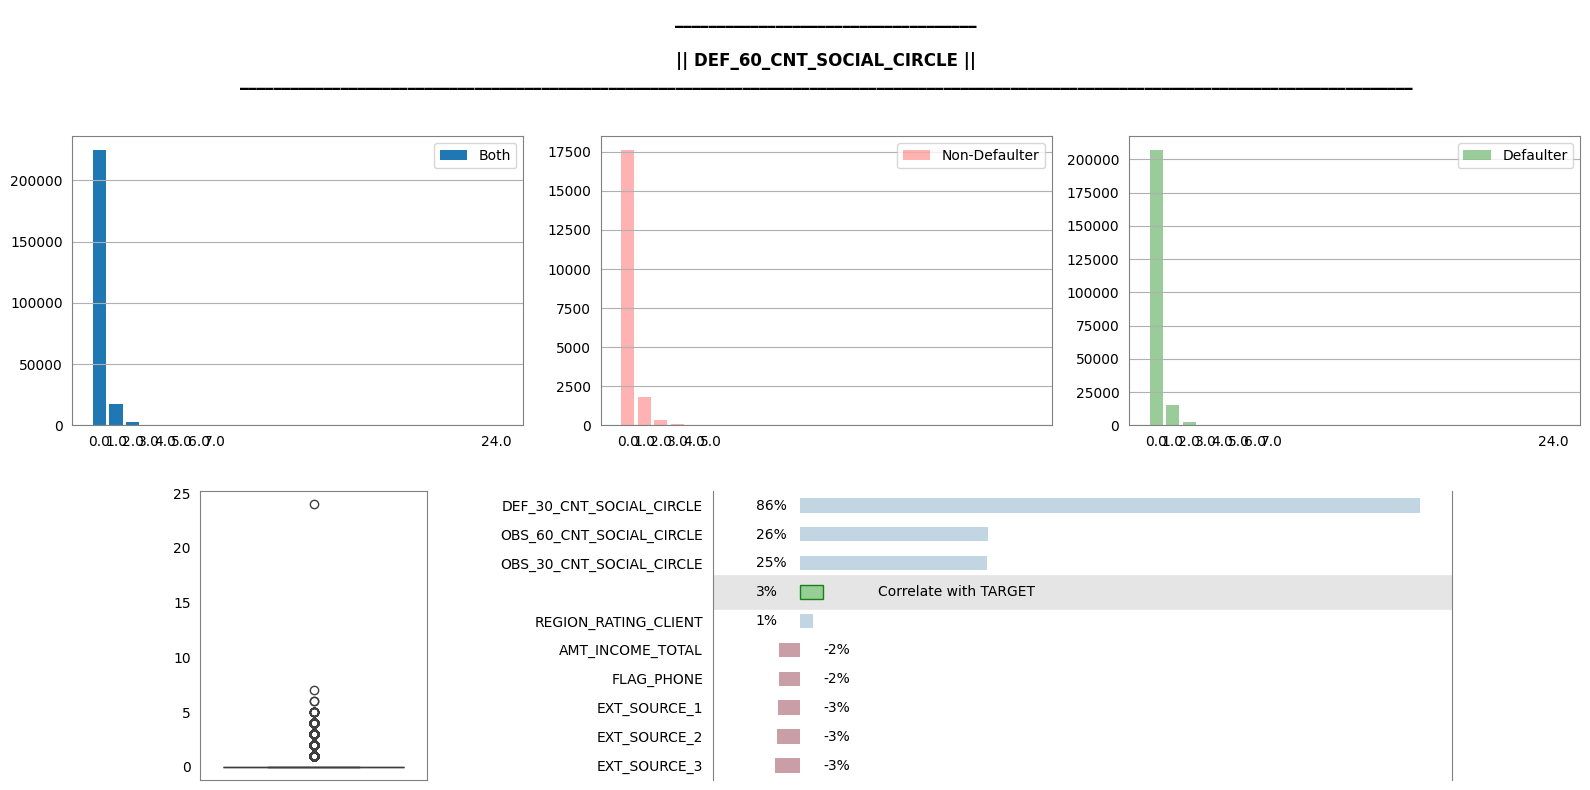

In [144]:
social = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
app_train[social] = app_train[social].astype('int',errors='ignore')
for col in social:
    num_visual(app_train,col,corr)

- These features have high correlation with each other and low correlation with TARGET variable

Frequence: AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,
 AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

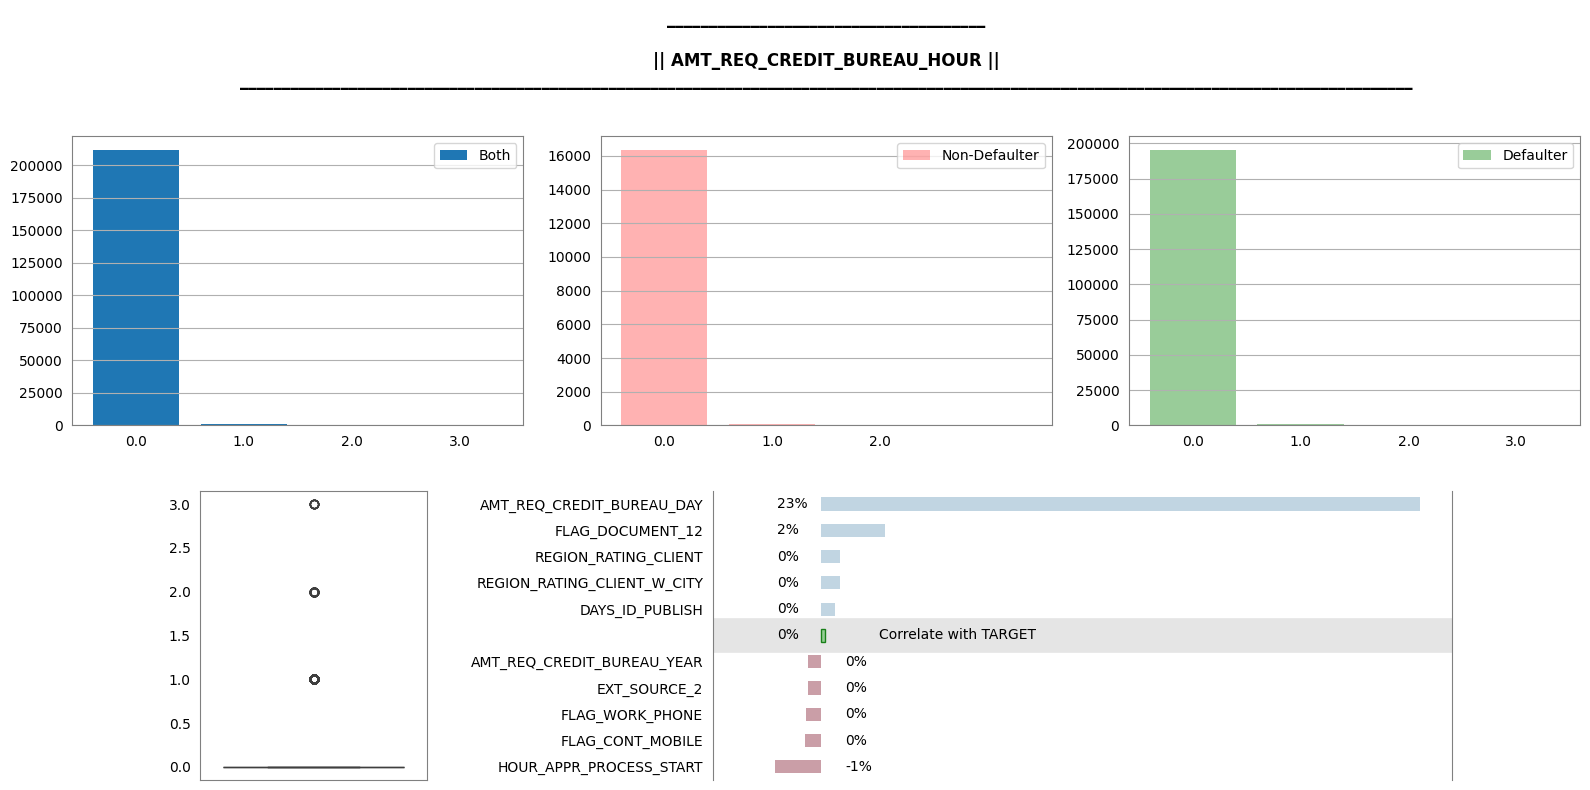

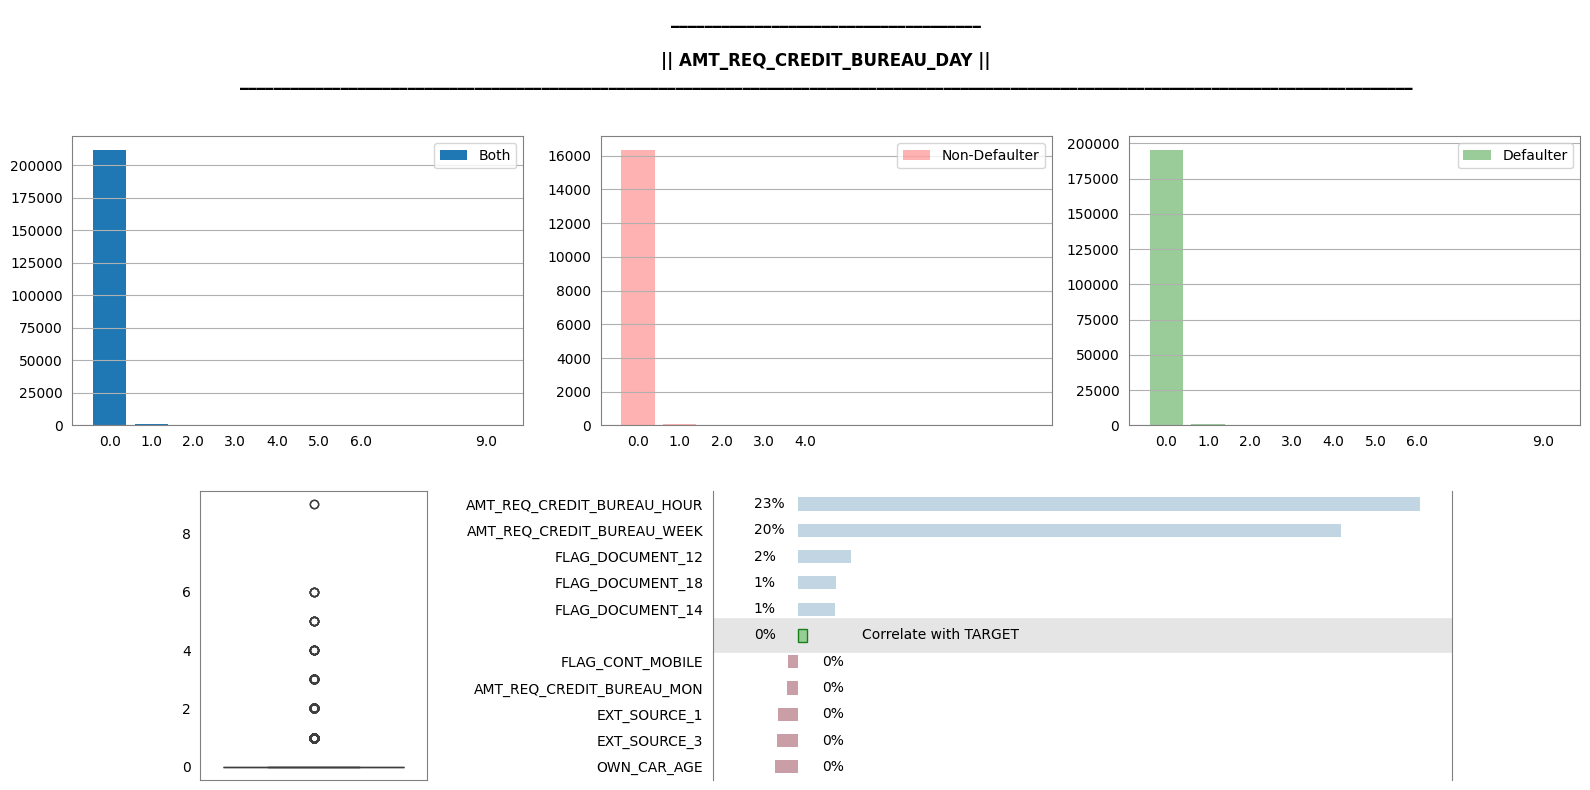

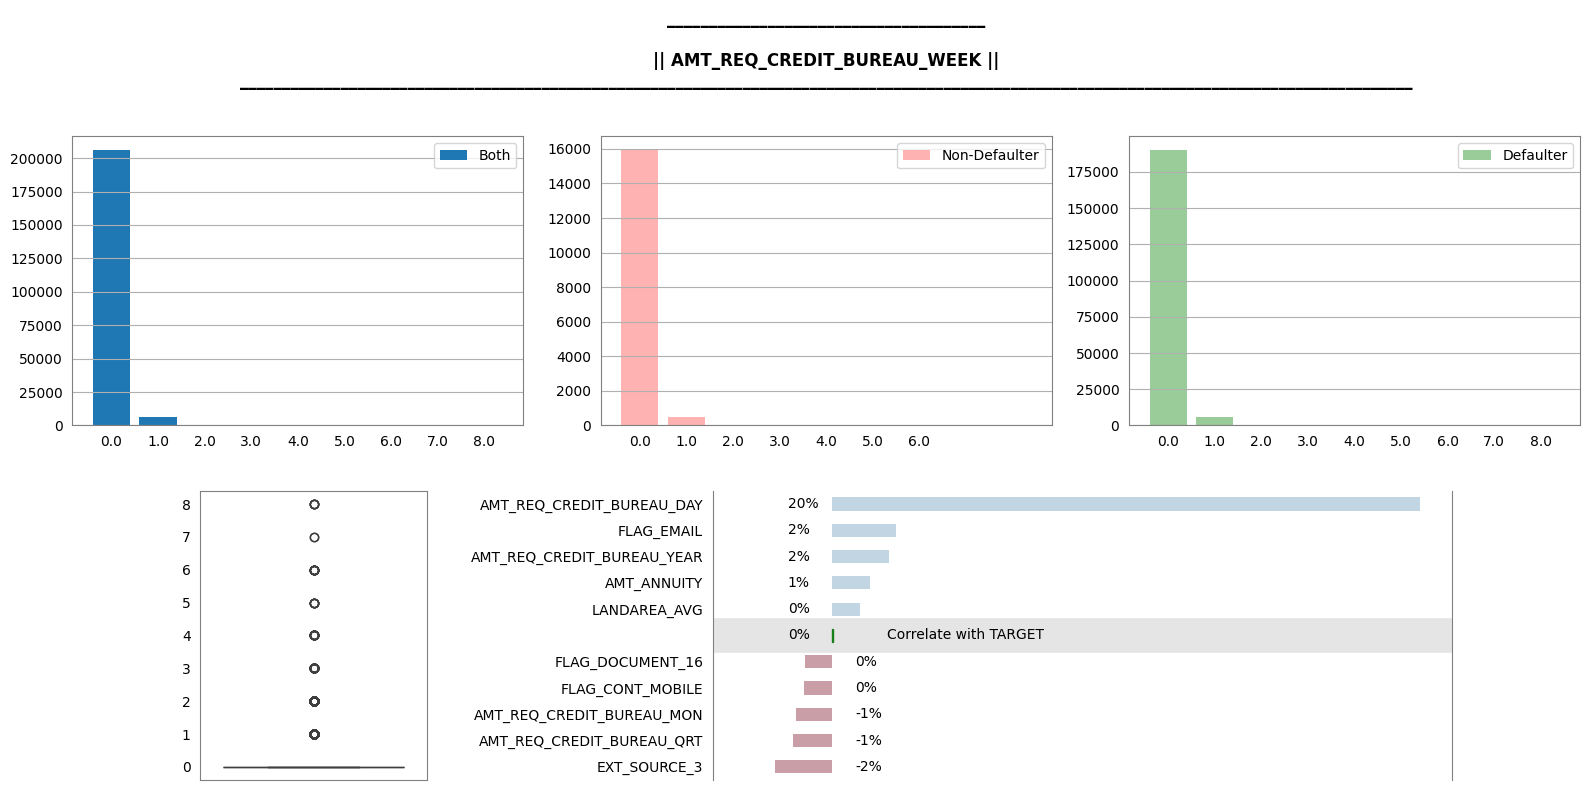

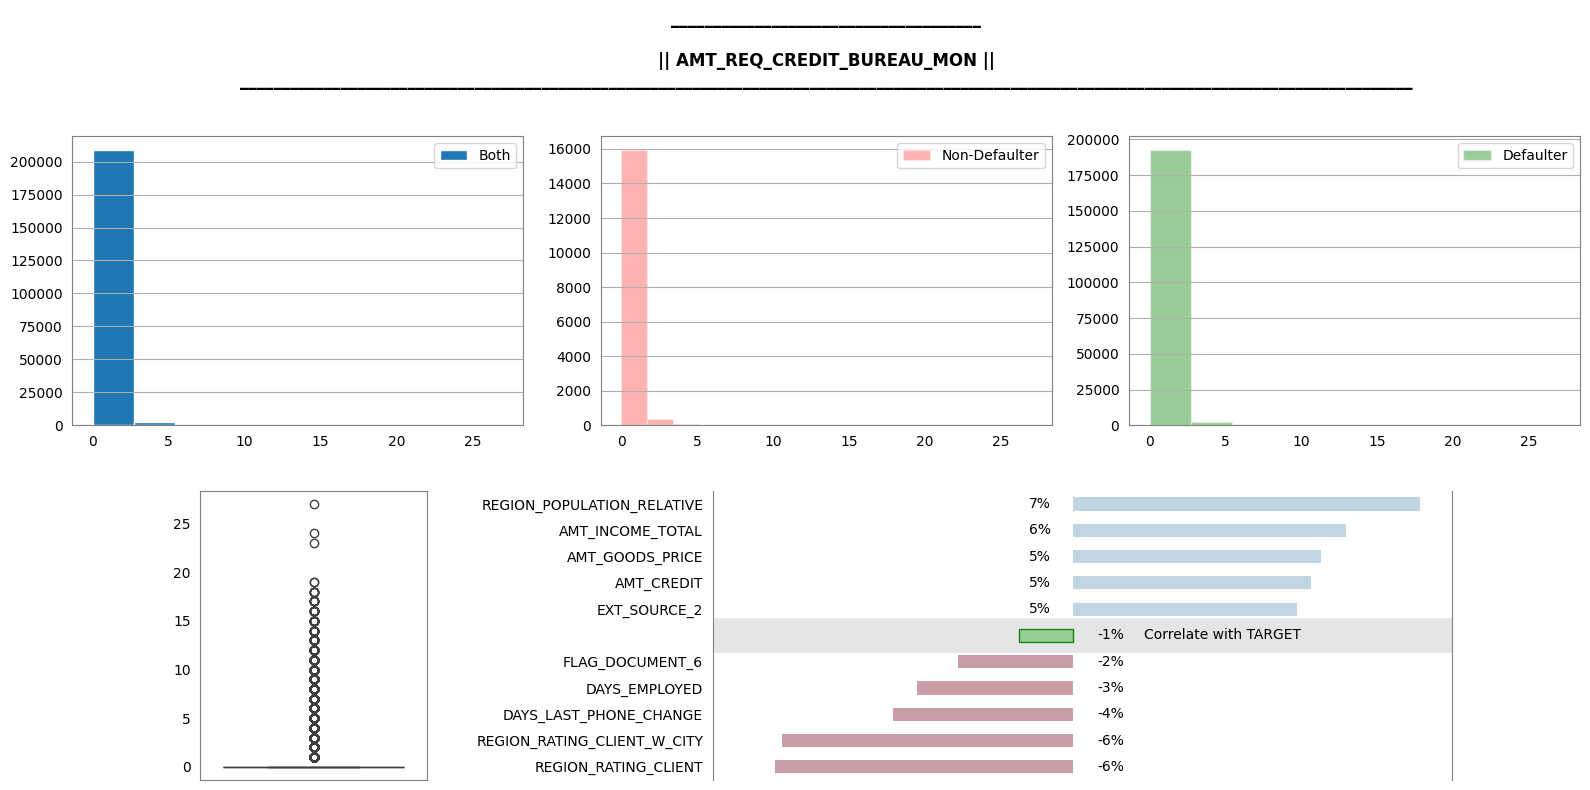

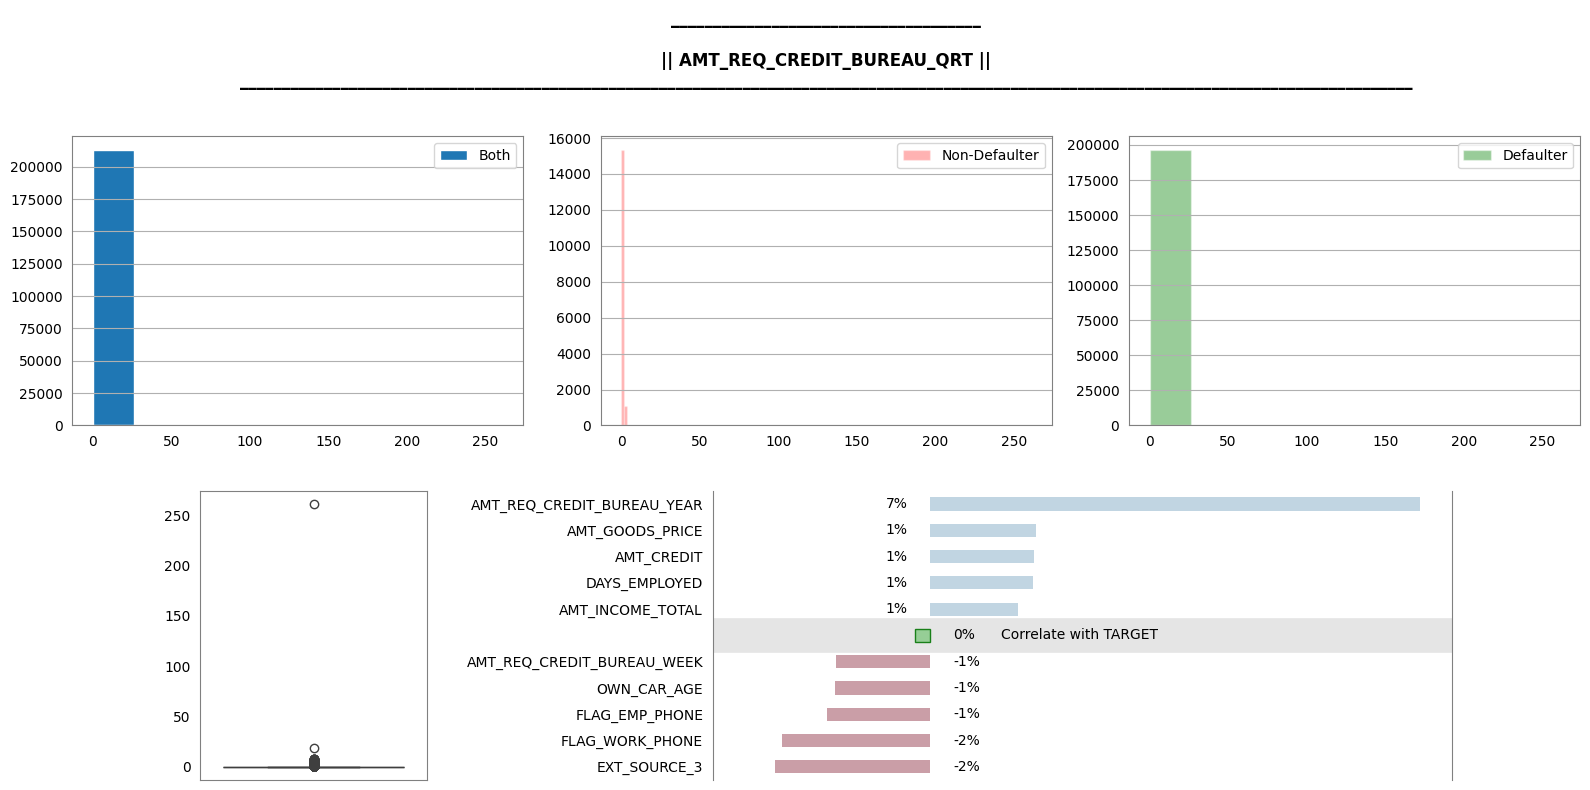

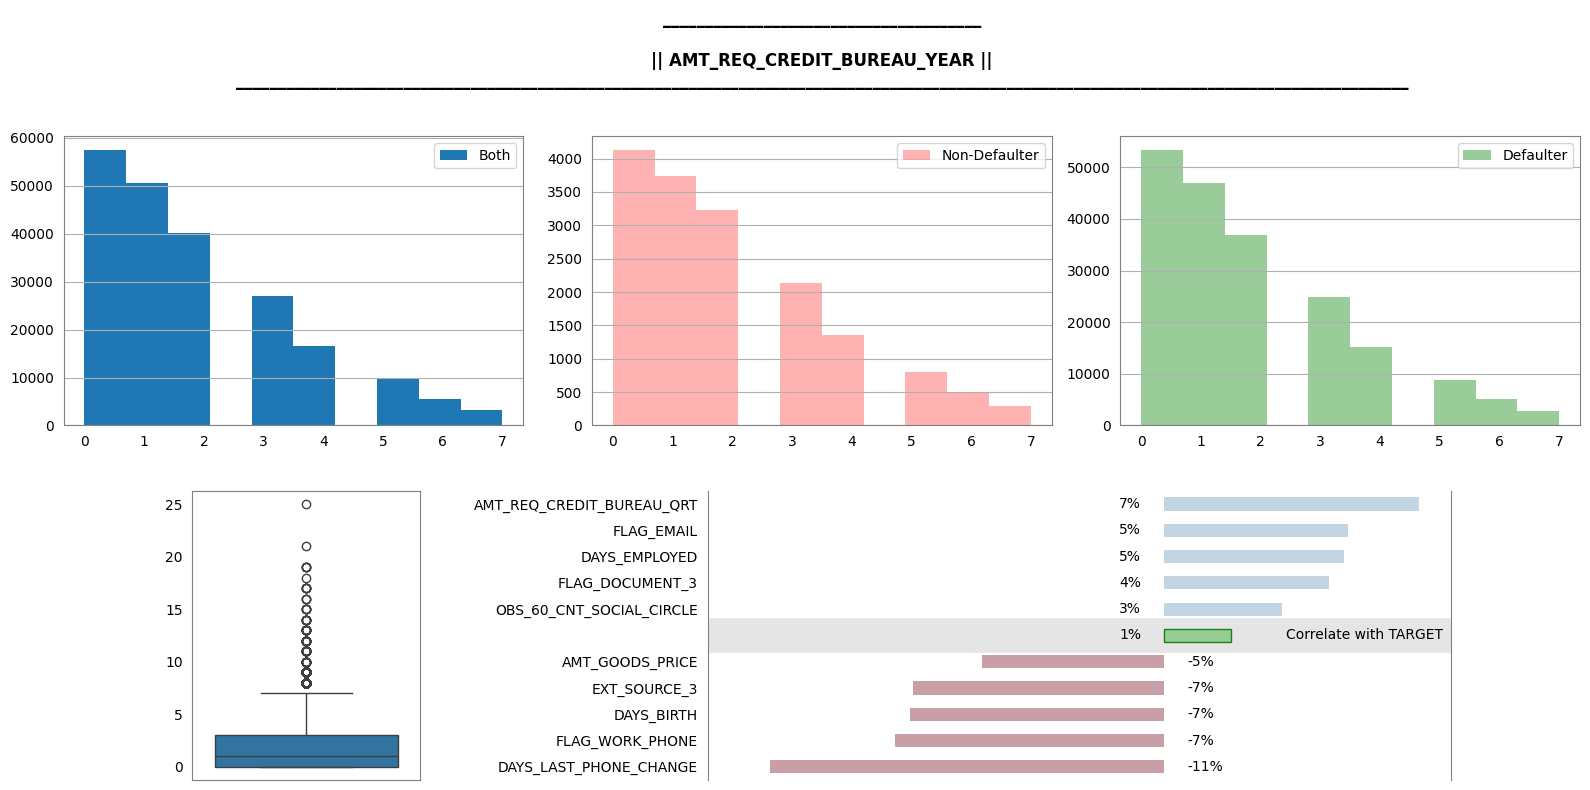

In [158]:
req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in req:
    num_visual(app_train,col,corr)

- Almost all of the above features have no correlation with TARGET, only AMT_REQ_CREDIT_BUREAU_MON and AMT_REQ_CREDIT_BUREAU_YEAR have some correlation

External Sources: EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3

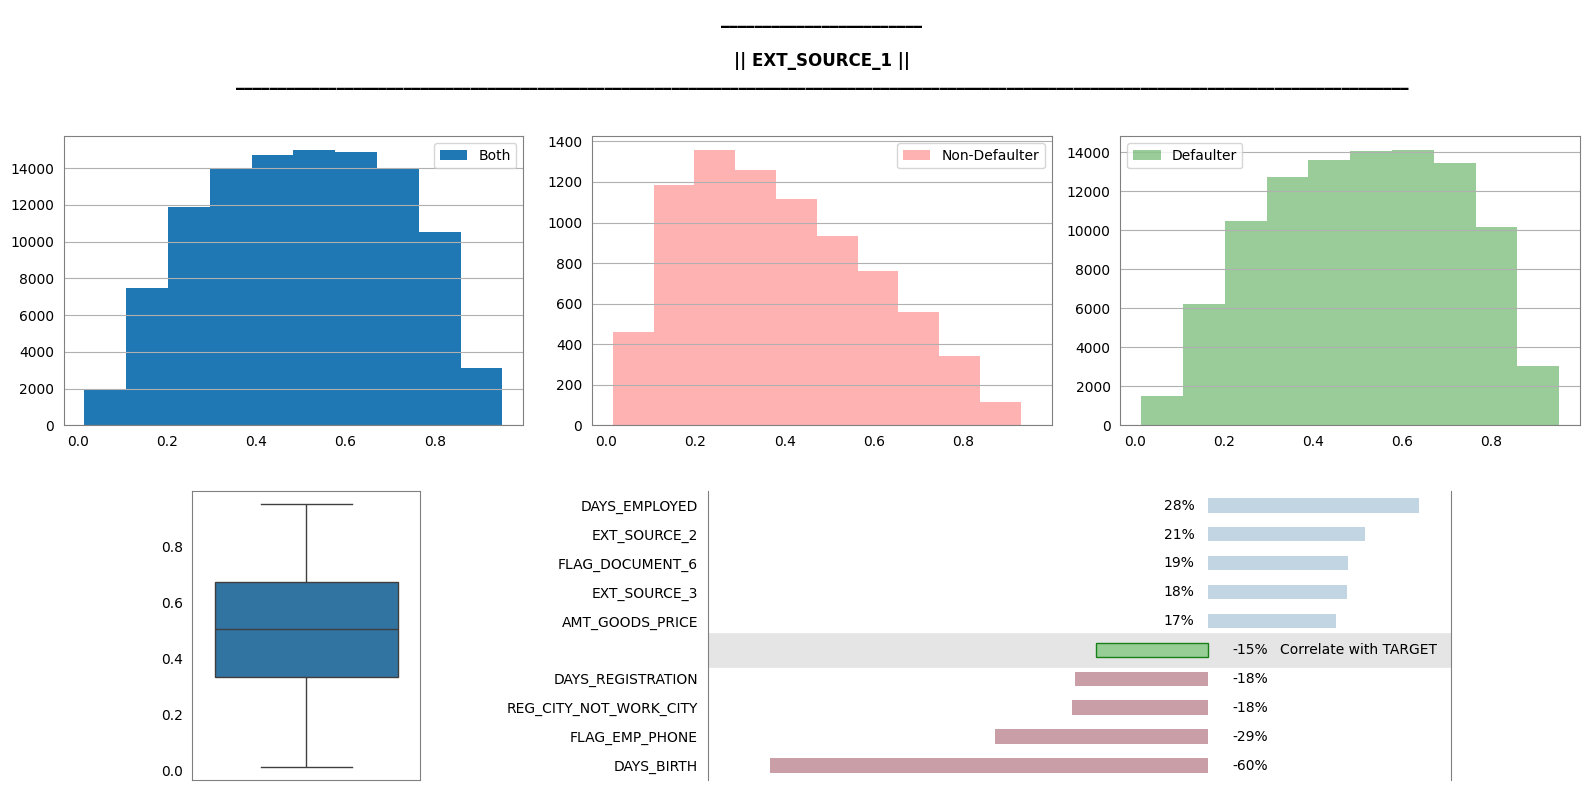

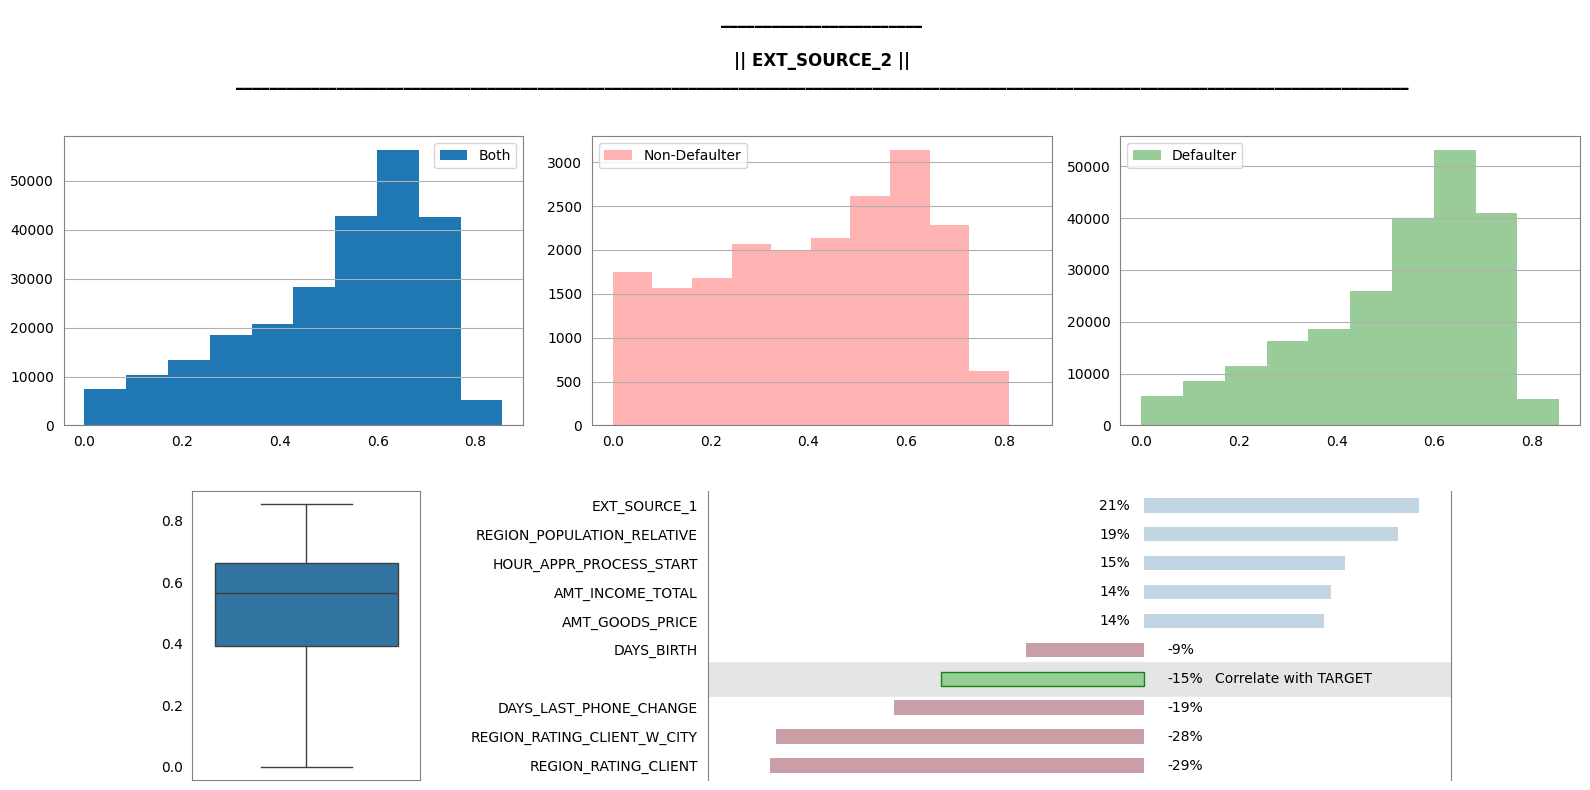

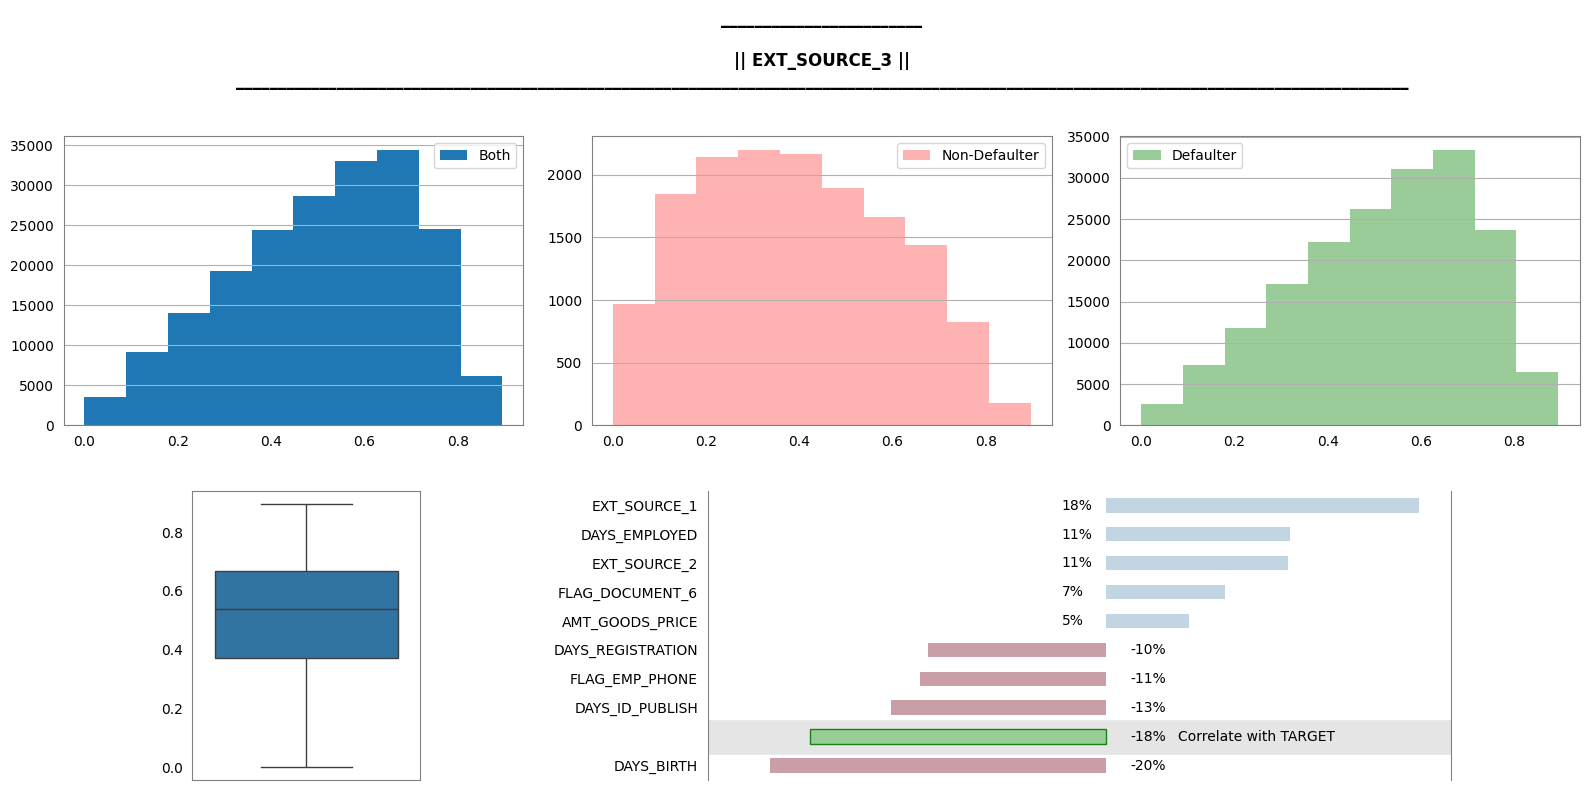

In [159]:
ext =['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in ext:
    num_visual(app_train,col,corr)

- EXT_SOURCE_1 and EXT_SOURCE_3 columns tend to show better discrimination/separability as compared to EXT_SOURCE_2.
- These 3 features look to be best separating the Defaulters and Non-Defaulters linearly among all the features so far
- EXT_SOURCE_1 seems to highly relate DAYS_ feature, while EXT_SOURCE_2 is close to REGION_ feature.
- EXT_SOURCE_3, EXT_SOURCE_2 is a good explainatory variable here (been normalized) but EXT_SOURCE_3 has around 20% null values. It is over 50% null when it come to EXT_SOURCE_1.

Day Features: DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH

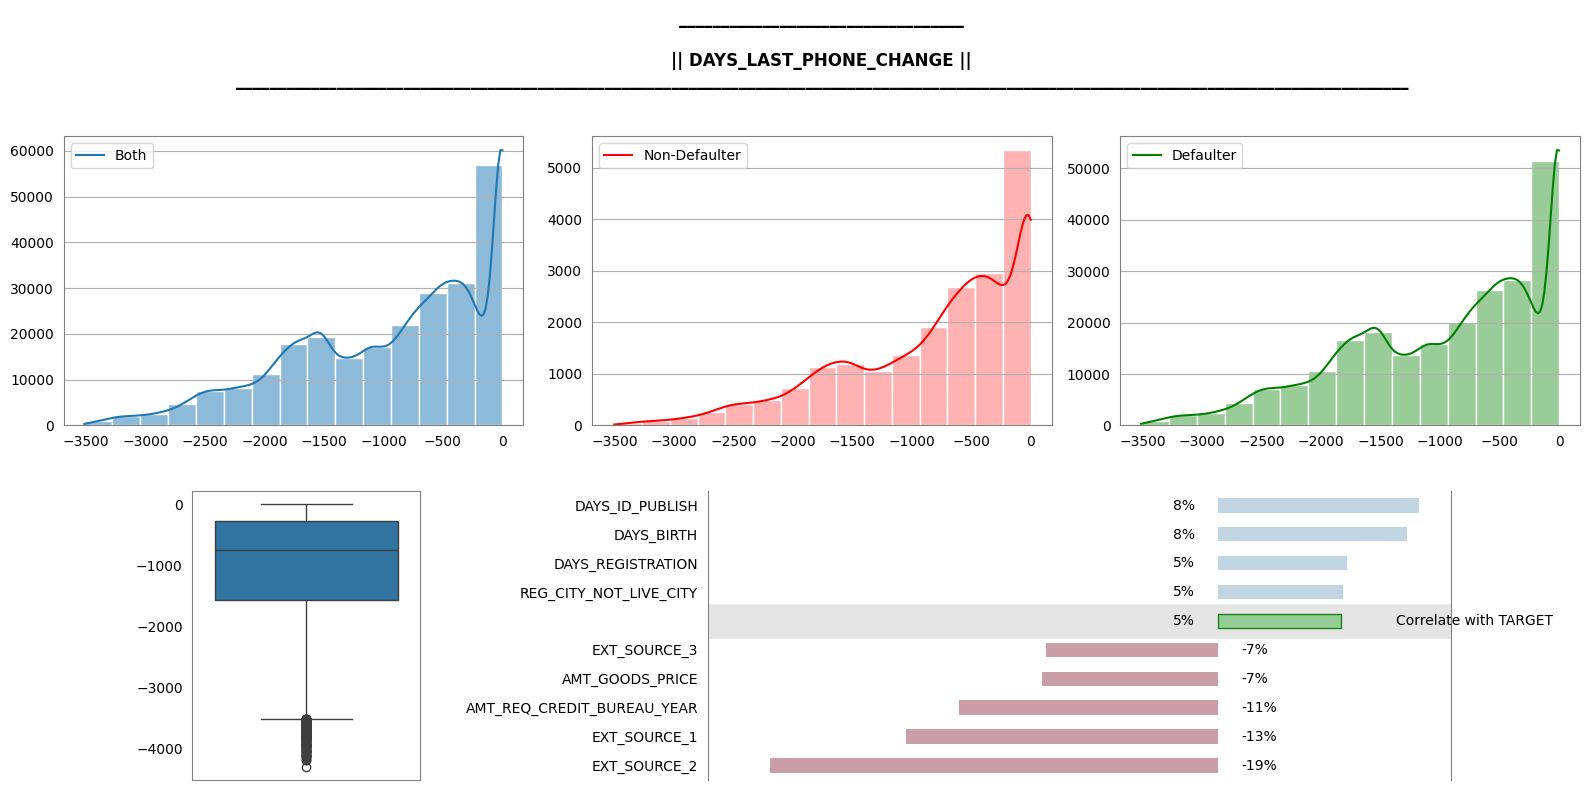

In [163]:
num_visual(app_train,'DAYS_LAST_PHONE_CHANGE',corr,kde=True)

- The distribution is different between non-defaulters and defaulters
- There is a large number of defaulters who just bought or replaced a new phone (a significant rise at the right edge of third plot in first row) -> understandable
- Have correlation with TARGET variable\
-> Meaningful feature

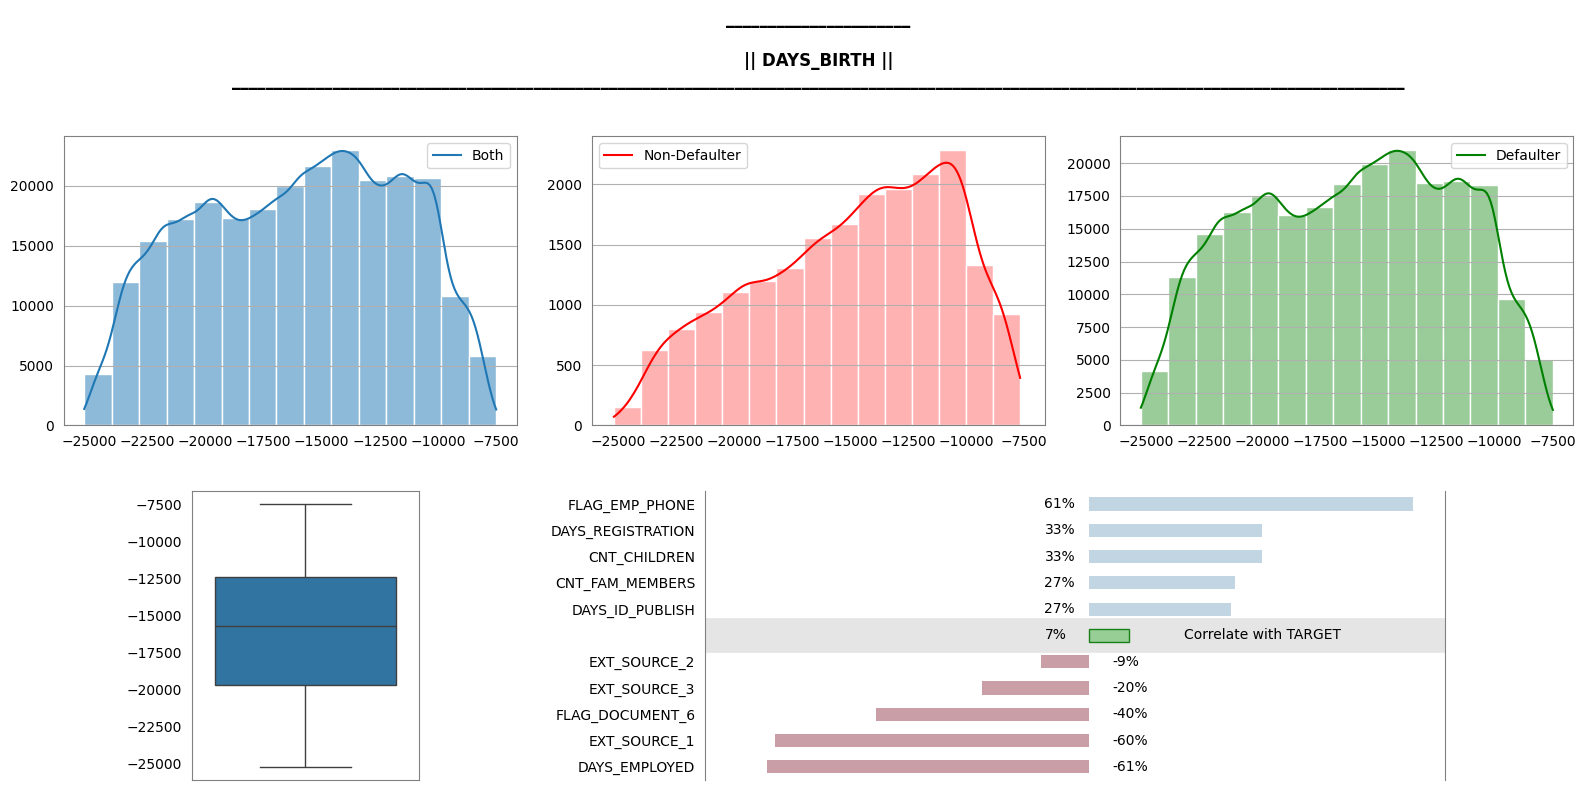

In [164]:
num_visual(app_train,'DAYS_BIRTH',corr,kde=True)

- The distribution of age for defaulters starts a bit left from the non-defaulters, and also is a bit throughout the range. This means that the Defaulters are usually younger than non-defaulters.
- We can transform from days birth to years to see the age insights of researched clients
- Have correlation with TARGET

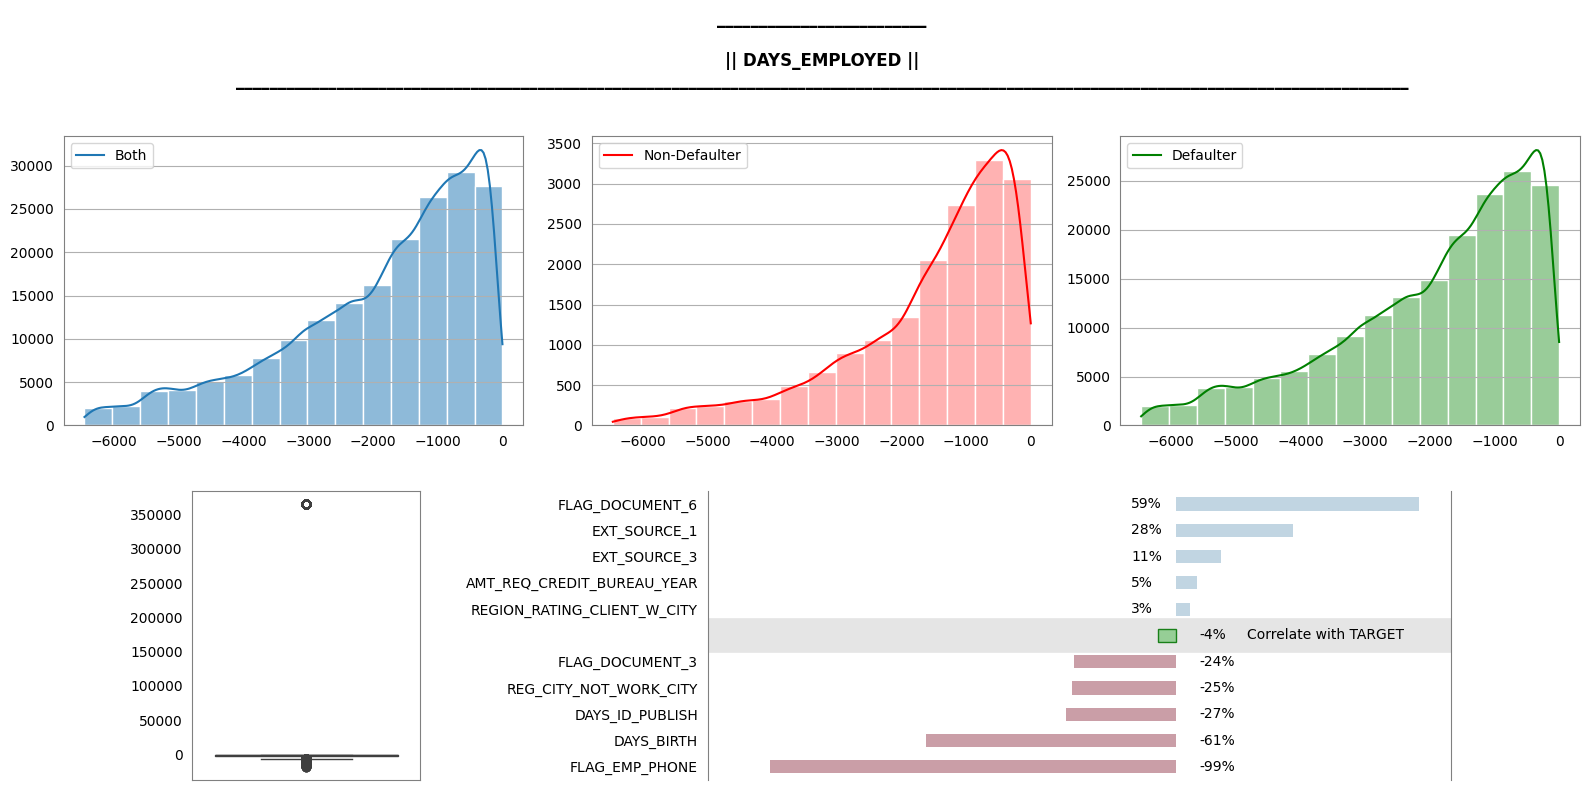

In [166]:
num_visual(app_train,'DAYS_EMPLOYED',corr,kde=True)

- Very high-correlated with 'FLAG_EMP_PHONE'
- Having outlier ~360000 -> we need to handle this outlier

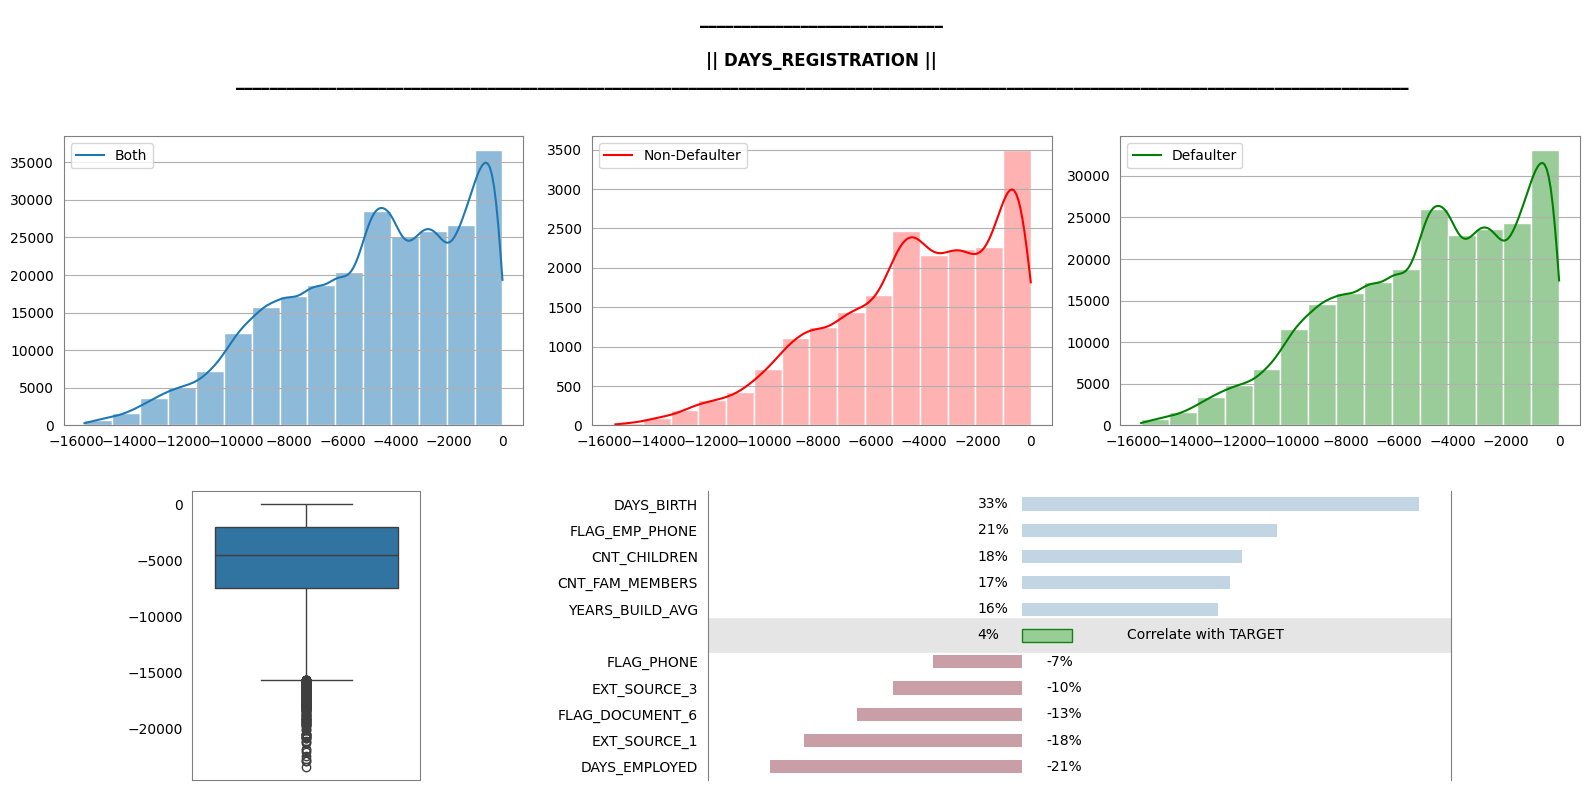

In [167]:
num_visual(app_train,'DAYS_REGISTRATION',corr,kde=True)

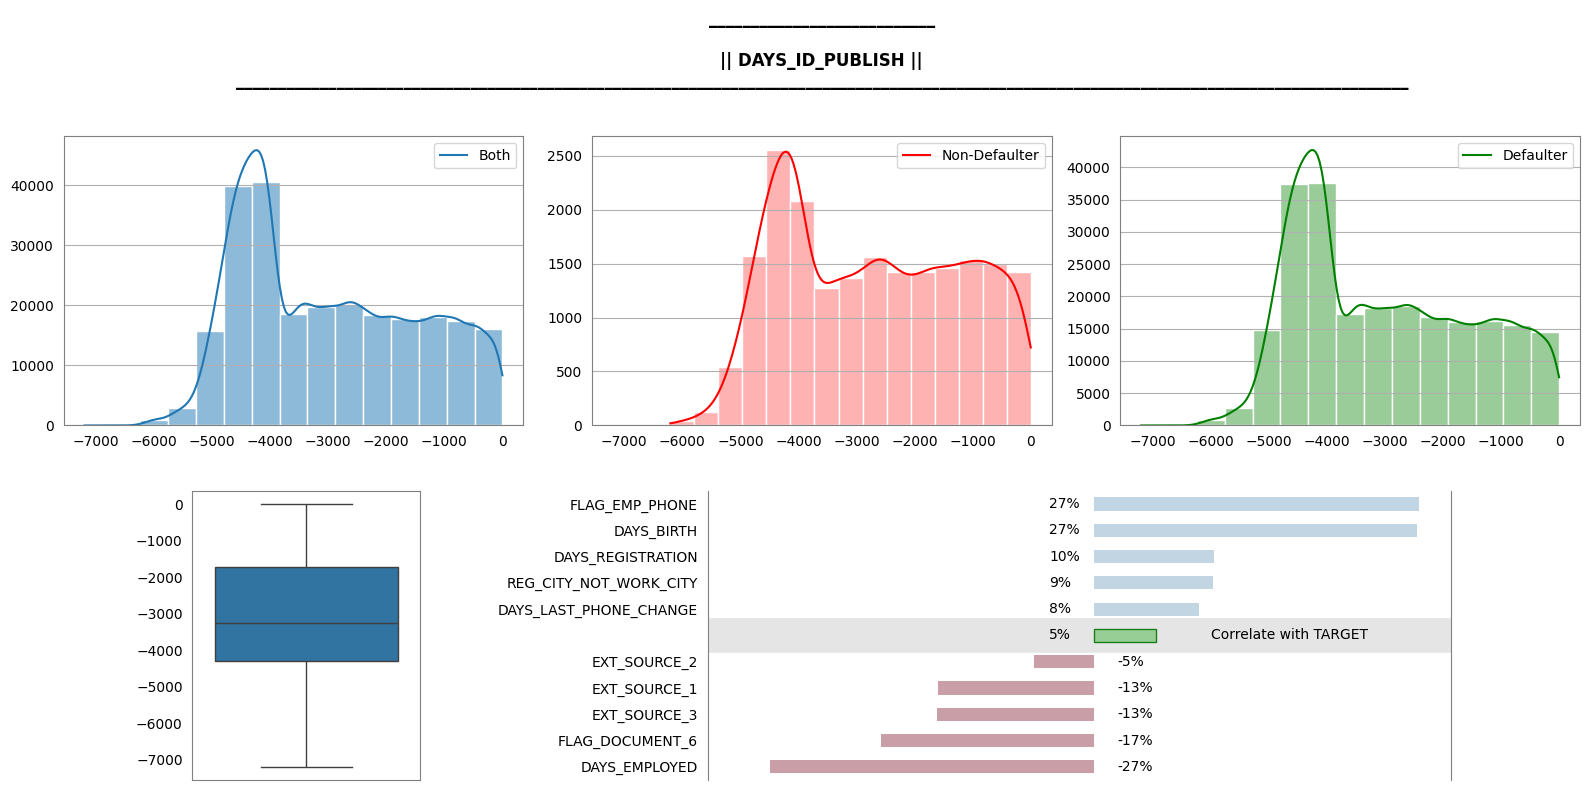

In [168]:
num_visual(app_train,'DAYS_ID_PUBLISH',corr,kde=True)

- The Defaulters usually had lesser number of days since they changed their identity. The Non-Defaulters show to have more number of days for all the quantiles since they changed their identity document.

# bureau, bureau_balance

## First sight

In [21]:
first_sight(bureau, 'bureau')

------------------------------
bureau
------------------------------
	Shape:(1465325, 17)
	Duplicate values:0
	First 5 rows:


SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       5714462        Closed      currency 1         -497   
1       5714463        Active      currency 1         -208   
2       5714464        Active      currency 1         -203   
3       5714465        Active      currency 1         -203   
4       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  SK_ID_CURR  
0  Consumer credit                -131          NaN      254629  
1      Credit card                 -20          NaN      254629  
2  Consumer credit                 -16          NaN      254629  
3      Credit card                 -16          NaN      254629  
4  Consumer credit                 -21          NaN      254629

	Features' datatype:


Datatype
SK_ID_BUREAU              int64
CREDIT_ACTIVE            object
CREDIT_CURRENCY          object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE     float64
DAYS_ENDDATE_FACT       float64
AMT_CREDIT_MAX_OVERDUE  float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM          float64
AMT_CREDIT_SUM_DEBT     float64
AMT_CREDIT_SUM_LIMIT    float64
AMT_CREDIT_SUM_OVERDUE  float64
CREDIT_TYPE              object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY             float64
SK_ID_CURR                int64

	Features' descriptive statistics:


count          mean           std          min  \
SK_ID_BUREAU            1465325.0  5.890328e+06  5.378271e+05  5000000.000   
DAYS_CREDIT             1465325.0 -1.143600e+03  8.000200e+02    -2922.000   
CREDIT_DAY_OVERDUE      1465325.0  8.887612e-01  3.824707e+01        0.000   
DAYS_CREDIT_ENDDATE     1376227.0  4.931322e+02  4.964905e+03   -42060.000   
DAYS_ENDDATE_FACT        920652.0 -1.022765e+03  7.183717e+02   -42023.000   
AMT_CREDIT_MAX_OVERDUE   516780.0  3.942852e+03  2.196856e+05        0.000   
CNT_CREDIT_PROLONG      1465325.0  7.278249e-03  1.026408e-01        0.000   
AMT_CREDIT_SUM          1465322.0  3.516889e+05  1.078009e+06        0.000   
AMT_CREDIT_SUM_DEBT     1242231.0  1.358890e+05  6.756650e+05 -4705600.320   
AMT_CREDIT_SUM_LIMIT     975655.0  6.363687e+03  4.543915e+04  -586406.115   
AMT_CREDIT_SUM_OVERDUE  1465325.0  4.010547e+01  6.273639e+03        0.000   
DAYS_CREDIT_UPDATE      1465325.0 -5.997869e+02  7.371010e+02   -41947.000   
AMT_ANNUITY              335312.0  1.576301e+04  2.681074e+05        0.000   
SK_ID_CURR              1465325.0  1.538762e+05  8.889888e+04        0.000   

                              25%           50%        75%           max  
SK_ID_BUREAU            5416944.0  5.856021e+06  6363543.0  6.843457e+06  
DAYS_CREDIT               -1671.0 -9.850000e+02     -470.0  0.000000e+00  
CREDIT_DAY_OVERDUE            0.0  0.000000e+00        0.0  2.792000e+03  
DAYS_CREDIT_ENDDATE       -1144.0 -3.340000e+02      473.0  3.119900e+04  
DAYS_ENDDATE_FACT         -1503.0 -9.000000e+02     -427.0  0.000000e+00  
AMT_CREDIT_MAX_OVERDUE        0.0  0.000000e+00        0.0  1.159872e+08  
CNT_CREDIT_PROLONG            0.0  0.000000e+00        0.0  9.000000e+00  
AMT_CREDIT_SUM            51165.0  1.246981e+05   308250.0  3.960000e+08  
AMT_CREDIT_SUM_DEBT           0.0  0.000000e+00    39654.0  1.701000e+08  
AMT_CREDIT_SUM_LIMIT          0.0  0.000000e+00        0.0  4.705600e+06  
AMT_CREDIT_SUM_OVERDUE        0.0  0.000000e+00        0.0  3.756681e+06  
DAYS_CREDIT_UPDATE         -904.0 -4.060000e+02      -33.0  3.720000e+02  
AMT_ANNUITY                   0.0  6.750000e+01    13990.5  5.958668e+07  
SK_ID_CURR                76685.0  1.540400e+05   230856.0  3.075090e+05

	Features' NaN values::
Number of columns having NaN values: 7 columns


Number of Missing Values  Percent of Missing Values
AMT_ANNUITY                              1130013                  77.116885
AMT_CREDIT_MAX_OVERDUE                    948545                  64.732738
DAYS_ENDDATE_FACT                         544673                  37.170798
AMT_CREDIT_SUM_LIMIT                      489670                  33.417160
AMT_CREDIT_SUM_DEBT                       223094                  15.224882
DAYS_CREDIT_ENDDATE                        89098                   6.080426
AMT_CREDIT_SUM                                 3                   0.000205

In [22]:
first_sight(bureau_balance,'bureau_balance')

------------------------------
bureau_balance
------------------------------
	Shape:(27299925, 3)
	Duplicate values:0
	First 5 rows:


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

	Features' datatype:


Datatype
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS           object

	Features' descriptive statistics:


count          mean            std        min        25%  \
SK_ID_BUREAU    27299925.0  6.036297e+06  492348.856904  5001709.0  5730933.0   
MONTHS_BALANCE  27299925.0 -3.074169e+01      23.864509      -96.0      -46.0   

                      50%        75%        max  
SK_ID_BUREAU    6070821.0  6431951.0  6842888.0  
MONTHS_BALANCE      -25.0      -11.0        0.0

	Features' NaN values::
Number of columns having NaN values: 0 columns


Empty DataFrame
Columns: [Number of Missing Values, Percent of Missing Values]
Index: []

In [23]:
# Merging the bureau balance table with bureau
bureau_merged = pd.merge(bureau, bureau_balance, on='SK_ID_BUREAU',how='left')

In [24]:
# Merging the bureau table with TARGET
bureau_merged = pd.merge(bureau_merged, app_train[['TARGET', 'SK_ID_CURR']], on='SK_ID_CURR',how='left')

In [25]:
first_sight(bureau_merged,'bureau_merged')

------------------------------
bureau_merged
------------------------------
	Shape:(15643422, 20)
	Duplicate values:0
	First 5 rows:


SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       5714462        Closed      currency 1         -497   
1       5714463        Active      currency 1         -208   
2       5714464        Active      currency 1         -203   
3       5714465        Active      currency 1         -203   
4       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  SK_ID_CURR  \
0  Consumer credit                -131          NaN      254629   
1      Credit card                 -20          NaN      254629   
2  Consumer credit                 -16          NaN      254629   
3      Credit card                 -16          NaN      254629   
4  Consumer credit                 -21          NaN      254629   

   MONTHS_BALANCE STATUS  TARGET  
0             NaN    NaN     0.0  
1             NaN    NaN     0.0  
2             NaN    NaN     0.0  
3             NaN    NaN     0.0  
4             NaN    NaN     0.0

	Features' datatype:


Datatype
SK_ID_BUREAU              int64
CREDIT_ACTIVE            object
CREDIT_CURRENCY          object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE     float64
DAYS_ENDDATE_FACT       float64
AMT_CREDIT_MAX_OVERDUE  float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM          float64
AMT_CREDIT_SUM_DEBT     float64
AMT_CREDIT_SUM_LIMIT    float64
AMT_CREDIT_SUM_OVERDUE  float64
CREDIT_TYPE              object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY             float64
SK_ID_CURR                int64
MONTHS_BALANCE          float64
STATUS                   object
TARGET                  float64

	Features' descriptive statistics:


count          mean           std          min  \
SK_ID_BUREAU            15643422.0  5.970646e+06  5.156930e+05  5000000.000   
DAYS_CREDIT             15643422.0 -1.535300e+03  7.702194e+02    -2922.000   
CREDIT_DAY_OVERDUE      15643422.0  9.765046e-01  4.056978e+01        0.000   
DAYS_CREDIT_ENDDATE     14857821.0  3.874712e+01  4.810811e+03   -42060.000   
DAYS_ENDDATE_FACT       11729938.0 -1.238235e+03  7.183741e+02   -42023.000   
AMT_CREDIT_MAX_OVERDUE   4449836.0  6.913733e+03  4.670952e+05        0.000   
CNT_CREDIT_PROLONG      15643422.0  9.558714e-03  1.205894e-01        0.000   
AMT_CREDIT_SUM          15643419.0  3.383958e+05  1.011578e+06        0.000   
AMT_CREDIT_SUM_DEBT     13011961.0  9.236338e+04  6.512671e+05 -4705600.320   
AMT_CREDIT_SUM_LIMIT     9316142.0  5.086597e+03  4.095134e+04  -586406.115   
AMT_CREDIT_SUM_OVERDUE  15643422.0  1.403726e+01  2.625574e+03        0.000   
DAYS_CREDIT_UPDATE      15643422.0 -8.047170e+02  7.113515e+02   -41947.000   
AMT_ANNUITY              8997850.0  1.413999e+04  2.769364e+05        0.000   
SK_ID_CURR              15643422.0  1.540358e+05  8.904781e+04        0.000   
MONTHS_BALANCE          14701612.0 -2.863028e+01  2.206971e+01      -96.000   
TARGET                  12524326.0  7.014980e-02  2.553993e-01        0.000   

                              25%        50%         75%           max  
SK_ID_BUREAU            5559095.0  6008944.0  6397827.00  6.843457e+06  
DAYS_CREDIT               -2229.0    -1479.0     -915.00  0.000000e+00  
CREDIT_DAY_OVERDUE            0.0        0.0        0.00  2.792000e+03  
DAYS_CREDIT_ENDDATE       -1606.0     -838.0       -1.00  3.119900e+04  
DAYS_ENDDATE_FACT         -1774.0    -1147.0     -666.00  0.000000e+00  
AMT_CREDIT_MAX_OVERDUE        0.0        0.0        0.00  1.159872e+08  
CNT_CREDIT_PROLONG            0.0        0.0        0.00  9.000000e+00  
AMT_CREDIT_SUM            49369.5   118822.5   294750.00  3.960000e+08  
AMT_CREDIT_SUM_DEBT           0.0        0.0        0.00  1.701000e+08  
AMT_CREDIT_SUM_LIMIT          0.0        0.0        0.00  4.705600e+06  
AMT_CREDIT_SUM_OVERDUE        0.0        0.0        0.00  3.756681e+06  
DAYS_CREDIT_UPDATE        -1164.0     -726.0     -169.00  3.720000e+02  
AMT_ANNUITY                   0.0        0.0    10383.39  5.958668e+07  
SK_ID_CURR                76343.0   154710.0   231174.00  3.075090e+05  
MONTHS_BALANCE              -43.0      -24.0      -10.00  0.000000e+00  
TARGET                        0.0        0.0        0.00  1.000000e+00

	Features' NaN values::
Number of columns having NaN values: 10 columns


Number of Missing Values  Percent of Missing Values
AMT_CREDIT_MAX_OVERDUE                  11193586                  71.554587
AMT_ANNUITY                              6645572                  42.481575
AMT_CREDIT_SUM_LIMIT                     6327280                  40.446905
DAYS_ENDDATE_FACT                        3913484                  25.016803
TARGET                                   3119096                  19.938707
AMT_CREDIT_SUM_DEBT                      2631461                  16.821518
MONTHS_BALANCE                            941810                   6.020486
STATUS                                    941810                   6.020486
DAYS_CREDIT_ENDDATE                       785601                   5.021926
AMT_CREDIT_SUM                                 3                   0.000019

# previous_application

In [27]:
first_sight(previous_application, 'previous_application')

------------------------------
previous_application
------------------------------
	Shape:(1413701, 37)
	Duplicate values:0
	First 5 rows:


SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495     Consumer loans     1730.430          17145.0     17145.0   
1     1696966     Consumer loans    68258.655        1800000.0   1754721.0   
2     2154916     Consumer loans    12417.390         108400.5    119848.5   
3     2802425         Cash loans    25188.615         607500.0    679671.0   
4     1536272         Cash loans    21709.125         450000.0    512370.0   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0               0.0          17145.0                   SATURDAY   
1          180000.0        1800000.0                   SATURDAY   
2               0.0         108400.5                     SUNDAY   
3               NaN         607500.0                   THURSDAY   
4               NaN         450000.0                  WEDNESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  CNT_PAYMENT  \
0                       15                           Y  ...         12.0   
1                       18                           Y  ...         36.0   
2                       14                           Y  ...         12.0   
3                       11                           Y  ...         36.0   
4                        9                           Y  ...         36.0   

   NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle    POS mobile with interest            365243.0   
1        low_normal  POS industry with interest                 NaN   
2            middle  POS industry with interest            365243.0   
3        low_action            Cash X-Sell: low            365243.0   
4        low_normal            Cash X-Sell: low            365243.0   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1            NaN                       NaN            NaN              NaN   
2         -512.0                    -182.0         -392.0           -387.0   
3         -134.0                     916.0       365243.0         365243.0   
4         -485.0                     565.0         -155.0           -147.0   

  NFLAG_INSURED_ON_APPROVAL SK_ID_CURR  
0                       0.0     293189  
1                       NaN     293189  
2                       0.0     293189  
3                       1.0      91587  
4                       1.0      91587  

[5 rows x 37 columns]

	Features' datatype:


Datatype
SK_ID_PREV                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_DOWN_PAYMENT             float64
AMT_GOODS_PRICE              float64
WEEKDAY_APPR_PROCESS_START    object
HOUR_APPR_PROCESS_START        int64
FLAG_LAST_APPL_PER_CONTRACT   object
NFLAG_LAST_APPL_IN_DAY         int64
RATE_DOWN_PAYMENT            float64
RATE_INTEREST_PRIMARY        float64
RATE_INTEREST_PRIVILEGED     float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_TYPE_SUITE               object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
SELLERPLACE_AREA               int64
NAME_SELLER_INDUSTRY          object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
DAYS_TERMINATION             float64
NFLAG_INSURED_ON_APPROVAL    float64
SK_ID_CURR                     int64

	Features' descriptive statistics:


count          mean            std  \
SK_ID_PREV                 1413701.0  1.922744e+06  532715.335255   
AMT_ANNUITY                1106483.0  1.583718e+04   14724.906897   
AMT_APPLICATION            1413701.0  1.752436e+05  293622.193141   
AMT_CREDIT                 1413700.0  1.963541e+05  319481.250716   
AMT_DOWN_PAYMENT            664161.0  6.655317e+03   20620.300440   
AMT_GOODS_PRICE            1094176.0  2.264512e+05  315937.604200   
HOUR_APPR_PROCESS_START    1413701.0  1.247893e+01       3.331474   
NFLAG_LAST_APPL_IN_DAY     1413701.0  9.964321e-01       0.059626   
RATE_DOWN_PAYMENT           664161.0  8.017486e-02       0.107784   
RATE_INTEREST_PRIMARY         4791.0  1.894359e-01       0.090849   
RATE_INTEREST_PRIVILEGED      4791.0  7.712840e-01       0.100644   
DAYS_DECISION              1413701.0 -8.803670e+02     783.540171   
SELLERPLACE_AREA           1413701.0  3.149878e+02    7695.081664   
CNT_PAYMENT                1106488.0  1.605194e+01      14.566746   
DAYS_FIRST_DRAWING          852595.0  3.422577e+05   88832.266598   
DAYS_FIRST_DUE              852595.0  1.348874e+04   71650.147146   
DAYS_LAST_DUE_1ST_VERSION   852595.0  3.327483e+04  106161.775933   
DAYS_LAST_DUE               852595.0  7.666563e+04  149704.716371   
DAYS_TERMINATION            852595.0  8.235317e+04  153537.064274   
NFLAG_INSURED_ON_APPROVAL   852595.0  3.305720e-01       0.470419   
SK_ID_CURR                 1413701.0  1.537647e+05   88673.919865   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461346e+06  1.922698e+06   
AMT_ANNUITY                0.000000e+00  6.257858e+03  1.122376e+04   
AMT_APPLICATION            0.000000e+00  1.975050e+04  7.087050e+04   
AMT_CREDIT                 0.000000e+00  2.488050e+04  8.059500e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.791000e+03   
AMT_GOODS_PRICE            0.000000e+00  4.982850e+04  1.102455e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  6.248933e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891363e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.313000e+03 -5.820000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  4.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.630000e+03 -8.250000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.244000e+03 -3.580000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.316000e+03 -5.340000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.269000e+03 -4.940000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   
SK_ID_CURR                 0.000000e+00  7.692000e+04  1.536860e+05   

                                    75%          max  
SK_ID_PREV                 2.384012e+06  2845381.000  
AMT_ANNUITY                2.042078e+04   418058.145  
AMT_APPLICATION            1.800000e+05  5850000.000  
AMT_CREDIT                 2.156400e+05  4509688.500  
AMT_DOWN_PAYMENT           7.695000e+03  3060045.000  
AMT_GOODS_PRICE            2.295000e+05  5850000.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089118e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.710000e+02       -1.000  
SELLERPLACE_AREA           8.500000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE            -4.080000e+02   365243.000  
DAYS_LAST_DUE_

	Features' NaN values::
Number of columns having NaN values: 16 columns


Number of Missing Values  Percent of Missing Values
RATE_INTEREST_PRIMARY                       1408910                  99.661102
RATE_INTEREST_PRIVILEGED                    1408910                  99.661102
AMT_DOWN_PAYMENT                             749540                  53.019698
RATE_DOWN_PAYMENT                            749540                  53.019698
NAME_TYPE_SUITE                              694672                  49.138538
DAYS_FIRST_DRAWING                           561106                  39.690571
DAYS_FIRST_DUE                               561106                  39.690571
DAYS_LAST_DUE_1ST_VERSION                    561106                  39.690571
DAYS_LAST_DUE                                561106                  39.690571
DAYS_TERMINATION                             561106                  39.690571
NFLAG_INSURED_ON_APPROVAL                    561106                  39.690571
AMT_GOODS_PRICE                              319525                  22.602021
AMT_ANNUITY                                  307218                  21.731469
CNT_PAYMENT                                  307213                  21.731116
PRODUCT_COMBINATION                             313                   0.022140
AMT_CREDIT                                        1                   0.000071

In [28]:
# Merging the application_train table with TARGET
previous_application_merged = pd.merge(previous_application, app_train[['TARGET', 'SK_ID_CURR']], on='SK_ID_CURR',how='left')

In [ ]:
previous_application_merged = previous_application_merged[previous_application_merged['TARGET'].notnull()]

## Categorical Variables

NAME_CONTRACT_TYPE

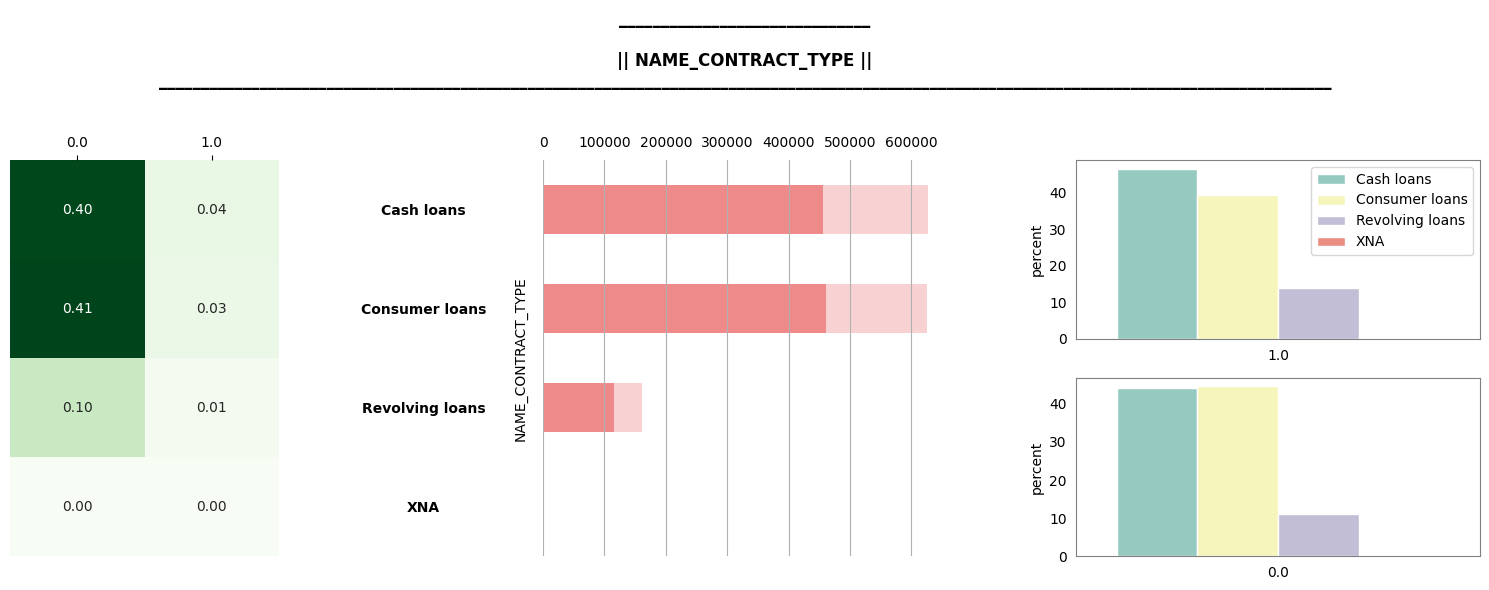

In [29]:
cat_visual(previous_application_merged, 'NAME_CONTRACT_TYPE')

- Most of the previous loans have been either Cash Loans or Consumer Loans, which correspond to roughly 44% of loans each. The remaining 11% corresponds to Revolving Loans, and there are some loans named XNA whose types are actually not known, but they are very few in numbers.

NAME_CONTRACT_STATUS

In [ ]:
def cat_visual(df,feature):
    if df[feature].nunique() < 3:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()*2.5))
    elif df[feature].nunique() < 5:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()*1.5))
    elif df[feature].nunique() < 20 :
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()/1.2))
    else:
        f, ax = plt.subplots(2,3,figsize = (5*3,df[feature].nunique()/1.6))
    gs = plt.GridSpec(2,3)
    f.delaxes(ax[1][1])
    f.delaxes(ax[1][0])
    axnew = f.add_subplot(gs[:,0])
    axnew2 = f.add_subplot(gs[:,1])
    f.delaxes(ax[0][1])
    f.delaxes(ax[0][0])

    #1
    ord = df[[feature,'TARGET']].value_counts(normalize=True).unstack().fillna(0)
    ord['order'] = ord.sum(axis = 1)
    ord.sort_values('order',ascending = False,inplace=True)
    hue_order = ord.index.tolist()
    ord.drop('order',axis= 1,inplace=True)
    sns.heatmap(ord, annot = True, cmap = 'Greens',fmt = '.2f',ax =axnew,cbar = False)
    

# Create heatmap
    axnew.set_yticklabels(axnew.get_yticklabels(),rotation =360,horizontalalignment =  'center',fontweight='bold')
    axnew.tick_params(bottom = False, left = False,right = False)
    axnew.xaxis.tick_top() 
    axnew.yaxis.tick_right()
    axnew.tick_params(bottom = False, left = False,right = False)
    l,u = (axnew.get_xlim())
    axnew.set_xlim(l,u+(u-l)/2)
    axnew.set_ylabel('')
    axnew.set_xlabel('')

    #2
    sns.barplot(df[feature].value_counts(),\
                orient='h',ax=axnew2,color= 'red',width = 0.5,alpha=0.2)   
    sns.barplot(df[df['TARGET']==0][feature].value_counts(),\
                orient='h',ax=axnew2,color= 'red',width = 0.5,alpha = 0.4)
    axnew2.spines[['top','bottom','left','right']].set_visible(False)
    axnew2.xaxis.tick_top() 
    axnew2.tick_params(left=False, bottom = False,top = False)

    axnew2.grid(axis = 'x')
    axnew2.set_xlabel('')
    axnew2.set_yticklabels('')

    #3
    sns.countplot(data= df[df['TARGET']==1], x ='TARGET', hue = feature ,ax= ax[0][2],\
                  stat = 'percent',palette='Set3',edgecolor = 'white',hue_order=hue_order,legend=False)
    sns.countplot(data= df[df['TARGET']==0], x ='TARGET', hue = feature ,ax= ax[1][2],\
                  stat = 'percent',palette='Set3',edgecolor = 'white',hue_order=hue_order,legend=False)
    
    ax[0][2].legend(hue_order,loc = 'upper right')

    for i in range(2):
        ax[i][2].spines[['top','bottom','left','right']].set_color('grey')
        ax[i][2].tick_params(left=False, bottom = False,top = False)
        ax[i][2].set_xlabel('')
 
    #beautify
    # axnew.set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)
    axnew2.set_title('_'*(len(feature)+12)+'\n\n'+'|| '+feature+' ||'+'\n'+'_'*140+'\n\n',fontweight = 'bold',fontsize=12)
    plt.tight_layout(w_pad=2)

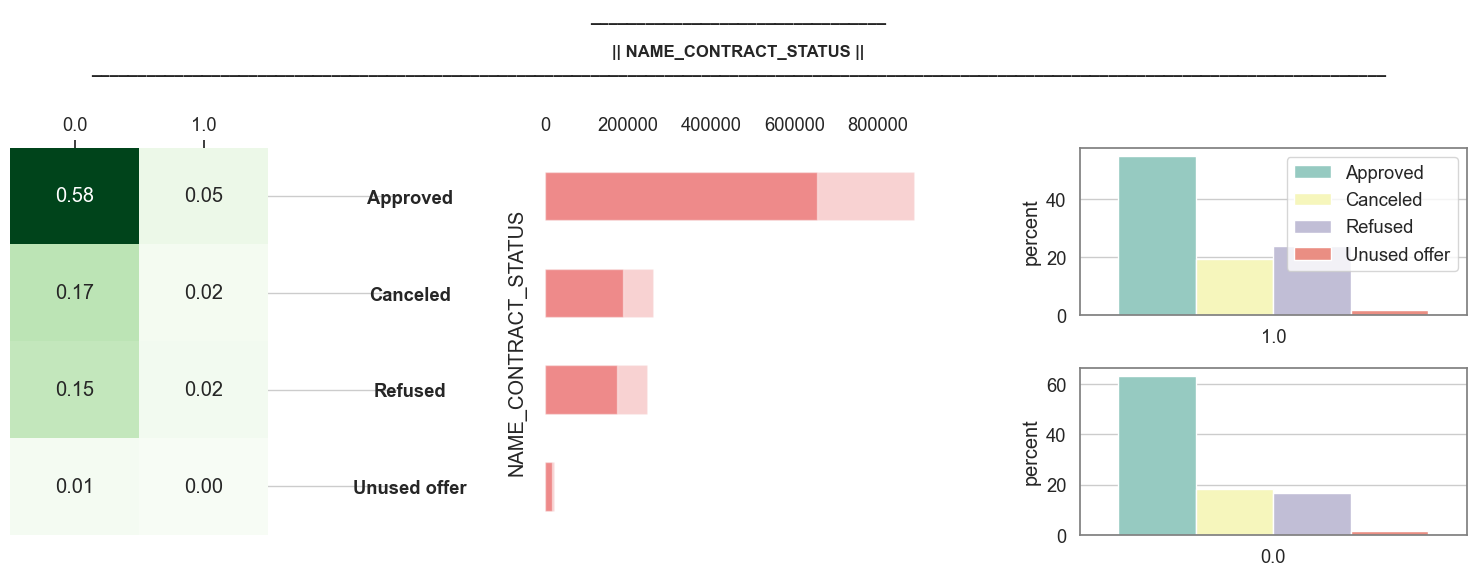

In [60]:
cat_visual(previous_application_merged,'NAME_CONTRACT_STATUS')

- The most common type of Contract Status is the Approved Status. About 60% of the previous Credits have an Approved Status. The next two common status are Canceled and Refused. This implies that most of the loans get approved and only some fraction of them do not. The least occurring type of contract status is Unused Offer which corresponds to just 1% of all the loans.

CODE_REJECT_REASON

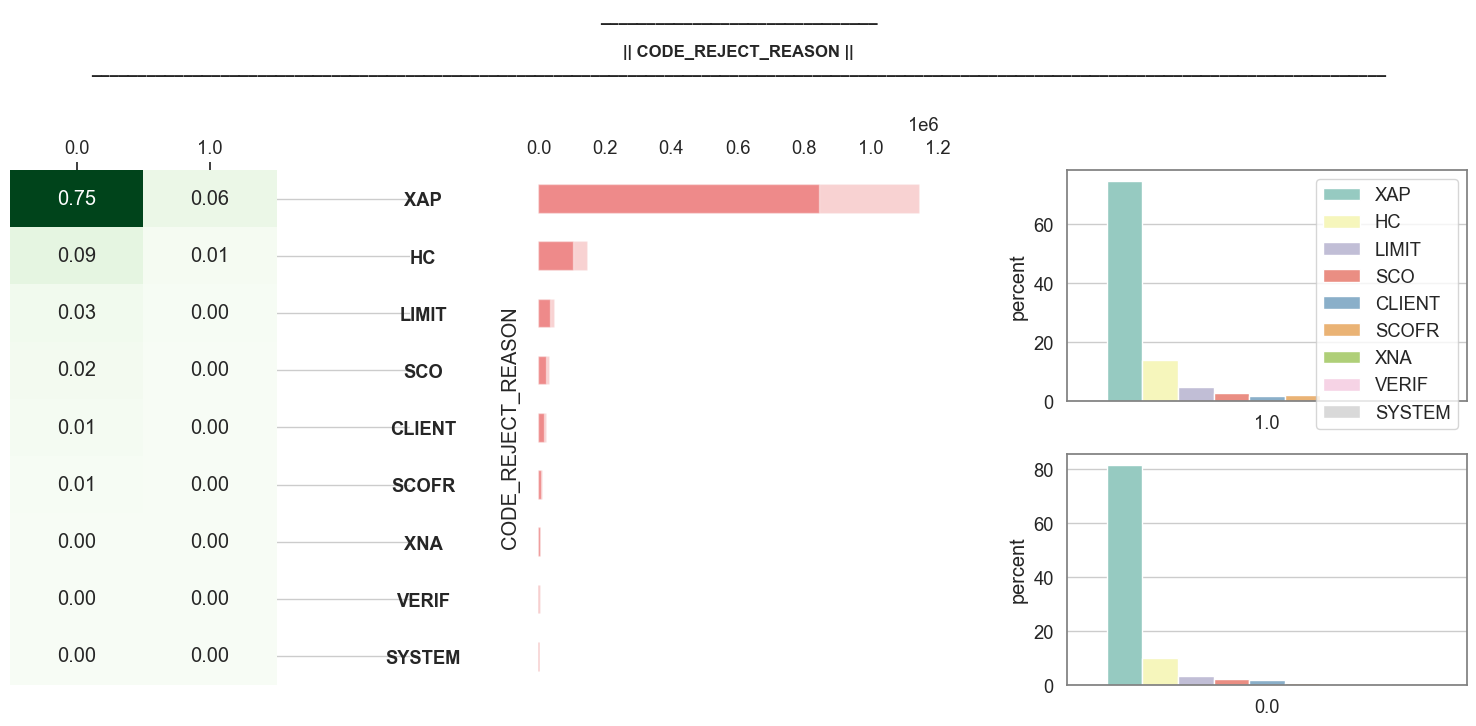

In [59]:
cat_visual(previous_application_merged, 'CODE_REJECT_REASON')

- The most common type of reason of rejection is XAP, which is about ~81%. The other reasons form only a small part of the rejection reasons. HC is the second highest rejection reason with just 10.33% of occurrences.

CHANNEL_TYPE

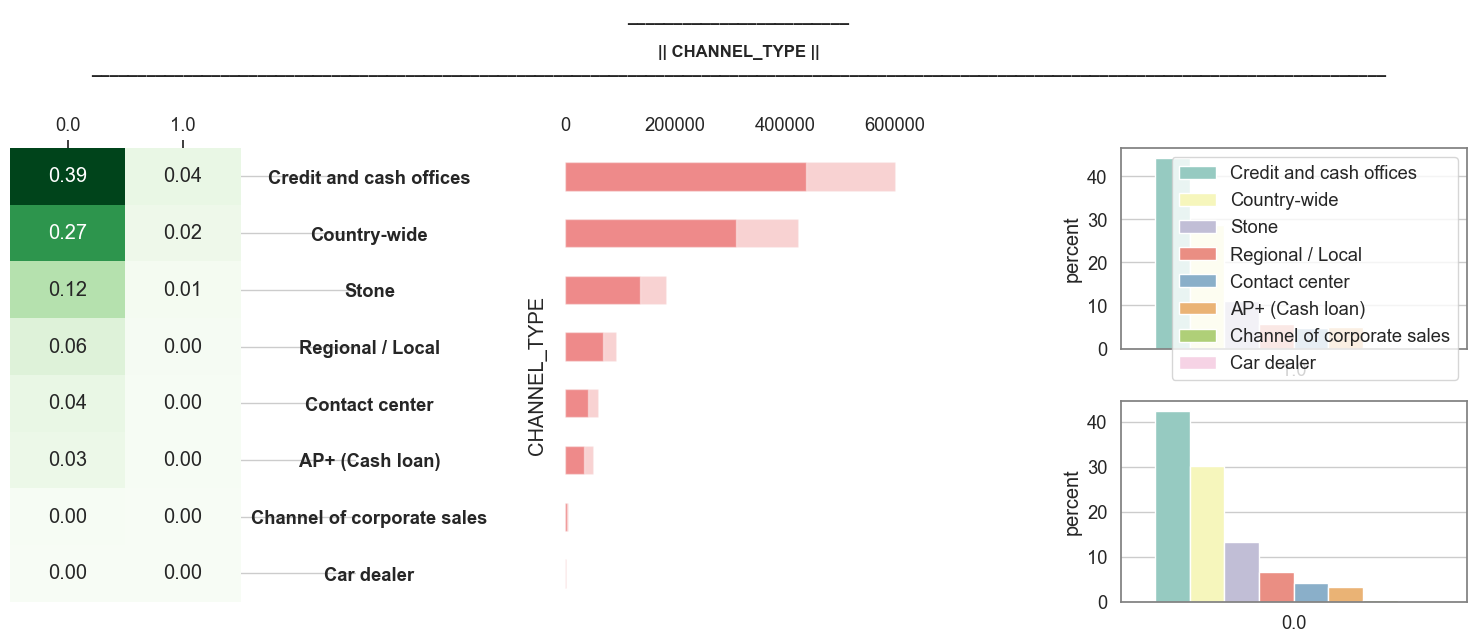

In [61]:
cat_visual(previous_application_merged, 'CHANNEL_TYPE')

- Most of the applications were acquired through the Credit and cash offices which were roughly 43% applications, which were followed by Country-wide channel corresponding to 29% applications. Rest of the channel types corresponded to only a select number of applications.

## Continuous Variables

In [62]:
corr = pd.DataFrame(previous_application_merged.select_dtypes(['int','float']).corr()).fillna(0)

DAYS DECISION

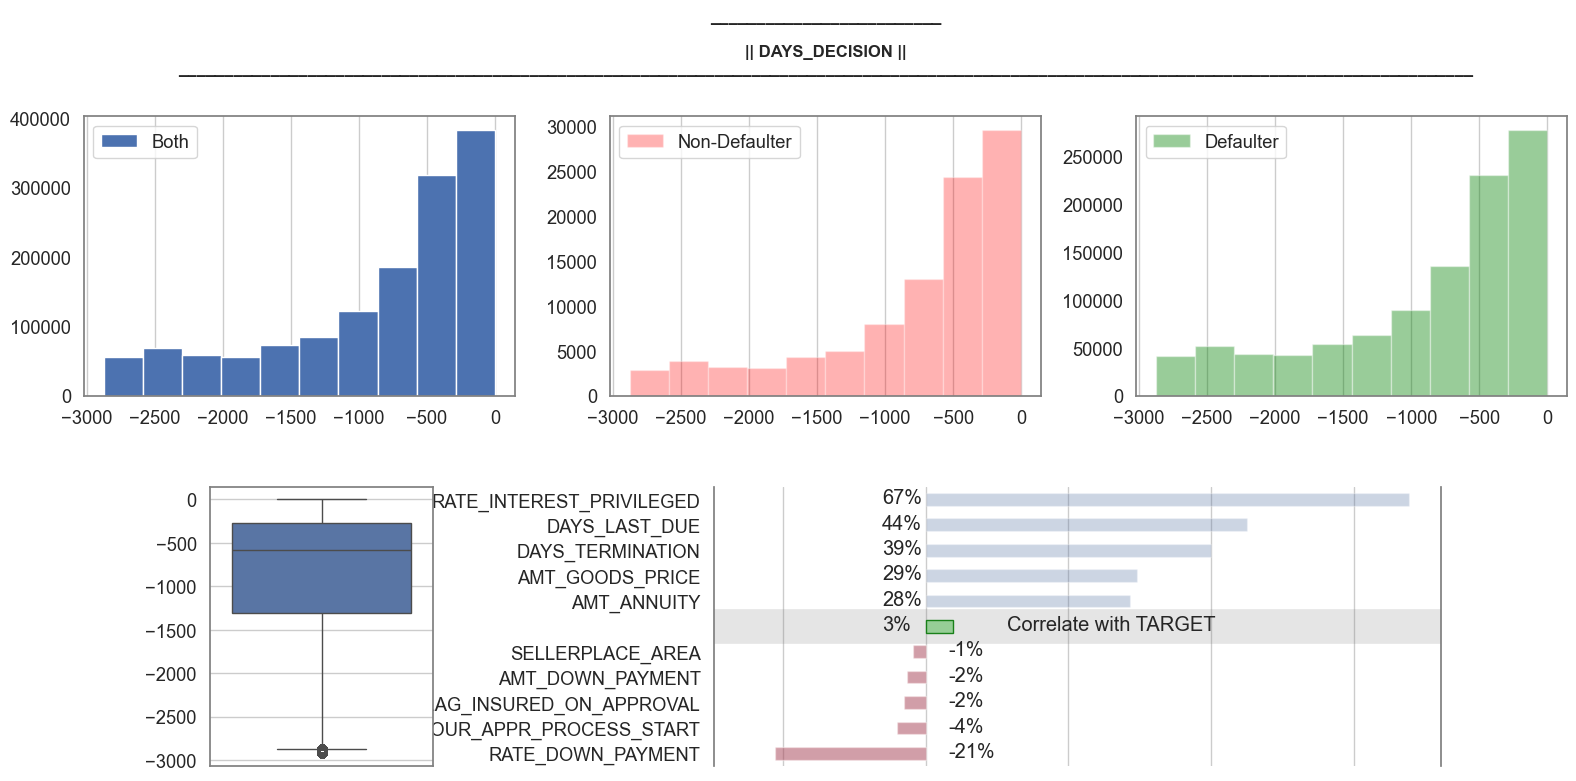

In [64]:
num_visual(previous_application_merged, 'DAYS_DECISION',corr)

- For Defaulters, the number of days back when the decision was made is a bit lesser than that for Non-Defaulters. This implies that the Defaulters usually had the decision on their previous applications made more recently as compared to Non-Defaulters.

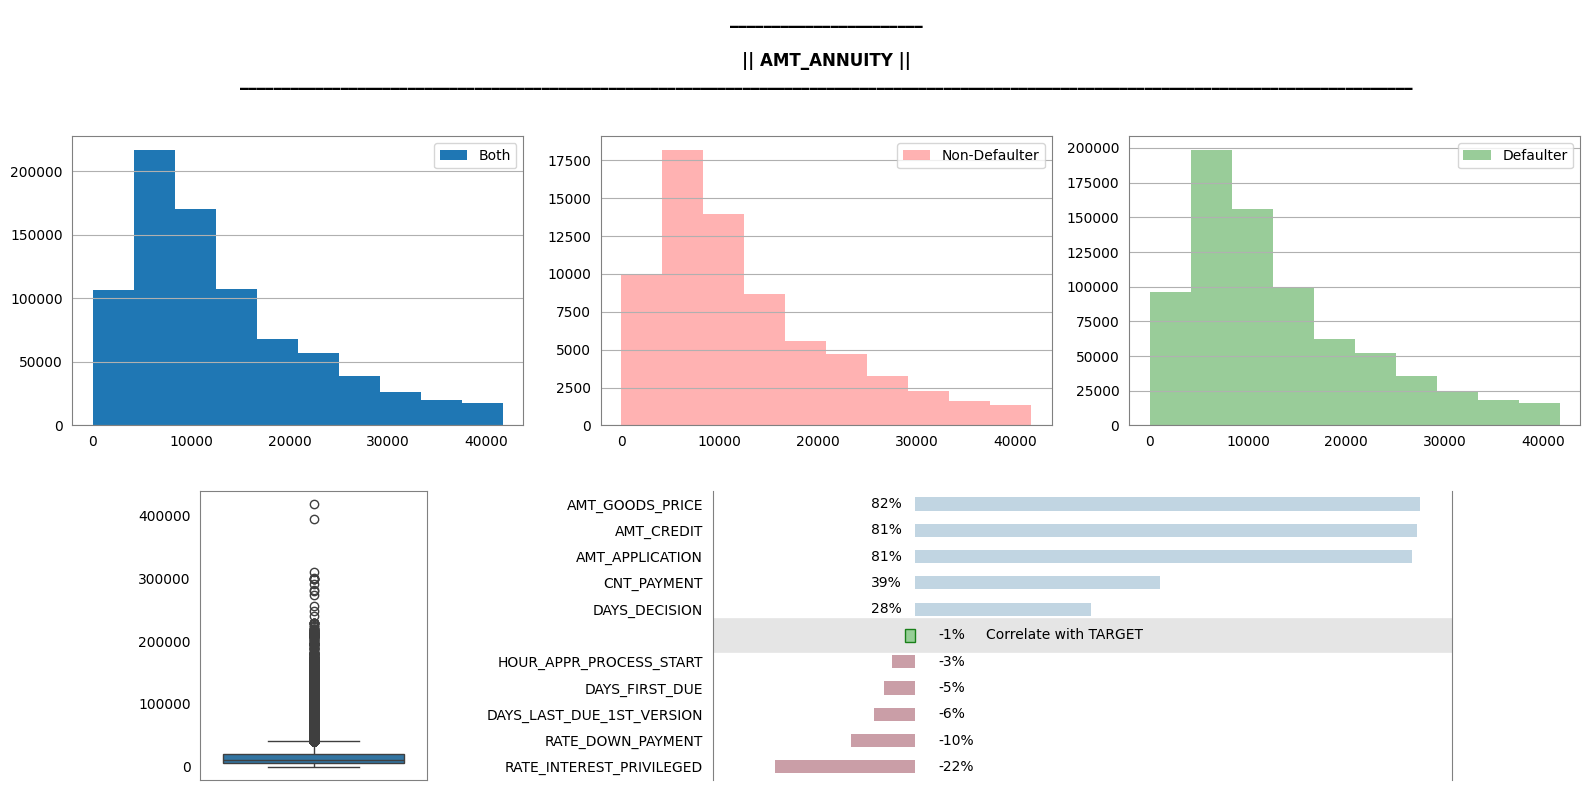

In [ ]:

num_visual(previous_application_merged, 'AMT_ANNUITY', corr)